# Online Retail II - Regresyon Analizi

Bu notebook, **Online Retail II** veri seti üzerinde kapsamlı bir **regresyon analizi** gerçekleştirmektedir. Analiz, çeşitli özellikler kullanarak satış miktarını (Quantity) tahmin etmeyi amaçlamaktadır.

**Veri Kaynağı:** [UCI Machine Learning Repository - Online Retail II](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

---

## 📋 Proje Özeti

### Amaç
E-ticaret işlem kayıtlarından çeşitli özellikleri kullanarak **satış miktarını (Quantity)** tahmin etmek.

### Hedef Değişken
- **Quantity**: Satılan ürün miktarı (Regresyon problemi)

### Analiz Yöntemleri
Bu notebook'ta aşağıdaki regresyon algoritmaları uygulanacaktır:
1. **Linear Regression**
2. **Ridge Regression**
3. **Lasso Regression**
4. **Random Forest Regressor**
5. **XGBoost Regressor**
6. **Model Karşılaştırması ve Değerlendirme**

---

## 📊 Veri Seti Hakkında

### Genel Bilgiler
- **Veri Tipi**: E-ticaret işlem kayıtları
- **Tarih Aralığı**: 01/12/2009 - 09/12/2011
- **Şirket**: İngiliz online perakende şirketi (hediyelik eşya)

### Orijinal Sütunlar
| Sütun Adı | Açıklama |
|-----------|----------|
| Invoice | Fatura numarası |
| StockCode | Ürün kodu |
| Description | Ürün açıklaması |
| Quantity | Satılan miktar (hedef değişken) |
| InvoiceDate | Fatura tarihi ve saati |
| Price | Birim fiyat (Sterlin) |
| Customer ID | Müşteri numarası |
| Country | Müşterinin ülkesi |

---

## 🔄 Analiz Adımları

1. **Veri Yükleme ve Keşifsel Veri Analizi (EDA)**
2. **Veri Temizliği ve Ön İşleme**
3. **Özellik Mühendisliği**
4. **Veri Görselleştirme**
5. **Model Eğitimi ve Değerlendirme**
6. **Model Karşılaştırması**
7. **En İyi Modelin Seçimi ve Kaydedilmesi**


## 📦 1. Kütüphanelerin İçe Aktarılması


In [1]:
# Veri işleme
import pandas as pd
import numpy as np
from pathlib import Path

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb

import warnings

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
warnings.filterwarnings('ignore')

print("✅ Kütüphaneler başarıyla yüklendi!")


✅ Kütüphaneler başarıyla yüklendi!


## 📥 2. Veri Yükleme


In [2]:
# Veri dosyasının yolu
# Notebook zaten regression-2 klasöründe olduğu için direkt data klasörüne gidiyoruz
BASE_DIR = Path.cwd()
# Eğer notebook başka bir yerden çalıştırılıyorsa, regression-2 klasörünü bul
if BASE_DIR.name != "regression-2":
    BASE_DIR = BASE_DIR / "regression-2"

data_path = BASE_DIR / "data" / "online_retail_II.xlsx"

# Veriyi yükle
print(f"📂 Veri dosyası yükleniyor: {data_path}")
print(f"📂 Dosya var mı: {data_path.exists()}")

if not data_path.exists():
    # Alternatif yol dene - direkt data klasöründen
    alt_yol = Path.cwd() / "data" / "online_retail_II.xlsx"
    if alt_yol.exists():
        data_path = alt_yol
        print(f"📂 Alternatif yol kullanılıyor: {data_path}")
    else:
        raise FileNotFoundError(f"Veri dosyası bulunamadı! Denenen yollar:\n1. {BASE_DIR / 'data' / 'online_retail_II.xlsx'}\n2. {alt_yol}")

df = pd.read_excel(data_path)

print(f"✅ Veri başarıyla yüklendi!")
print(f"📊 Veri boyutu: {df.shape}")
print(f"\nİlk 5 satır:")
df.head()


📂 Veri dosyası yükleniyor: c:\Users\akif\Desktop\code\machine-learning-project\uni-homework\regression-2\data\online_retail_II.xlsx
📂 Dosya var mı: True
✅ Veri başarıyla yüklendi!
📊 Veri boyutu: (525461, 8)

İlk 5 satır:


Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

## 🔍 3. Keşifsel Veri Analizi (EDA)


In [3]:
# Temel bilgiler
print("=" * 60)
print("📊 VERİ SETİ GENEL BİLGİLERİ")
print("=" * 60)
print(f"\nSatır sayısı: {df.shape[0]:,}")
print(f"Sütun sayısı: {df.shape[1]}")
print(f"\nSütun isimleri:")
print(df.columns.tolist())
print(f"\nVeri tipleri:")
print(df.dtypes)
print(f"\nEksik değerler:")
print(df.isnull().sum())
print(f"\nTemel istatistikler:")
df.describe()


📊 VERİ SETİ GENEL BİLGİLERİ

Satır sayısı: 525,461
Sütun sayısı: 8

Sütun isimleri:
['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']

Veri tipleri:
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

Eksik değerler:
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

Temel istatistikler:


Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25%     13983.000000  
50%     15311.000000  
75%     16799.000000  
max     18287.000000  
std      1680.811316

🎯 HEDEF DEĞİŞKEN (QUANTITY) ANALİZİ

Quantity istatistikleri:
count    525461.000000
mean         10.337667
std         107.424110
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       19152.000000
Name: Quantity, dtype: float64

Negatif değer sayısı (iade): 12326
Sıfır değer sayısı: 0
Pozitif değer sayısı: 513135


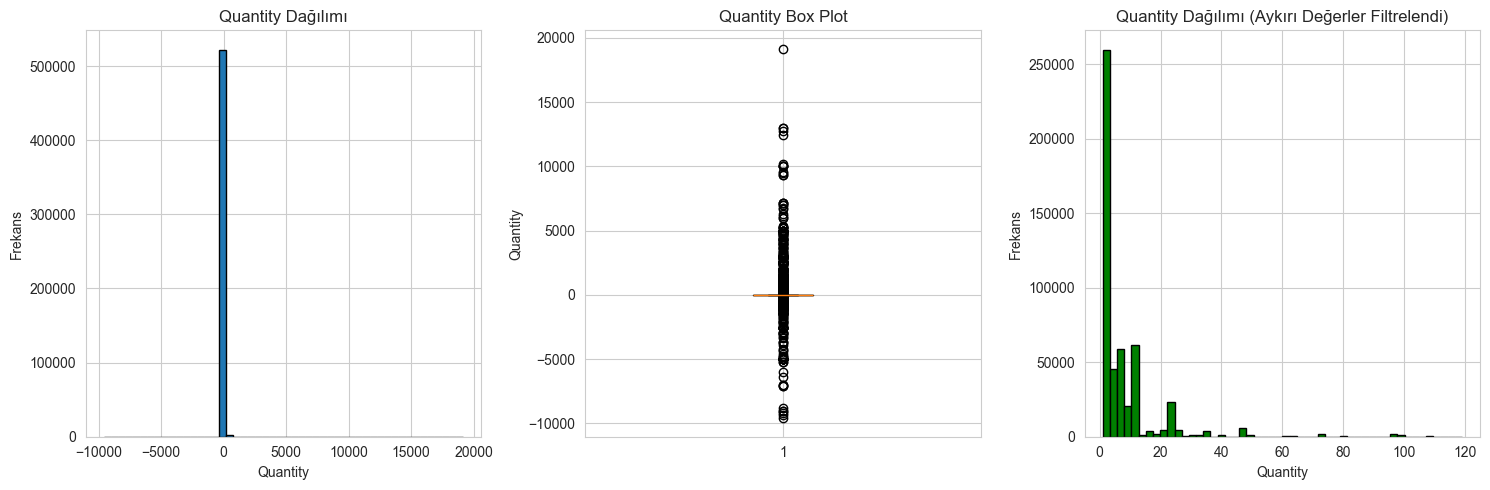

In [4]:
# Hedef değişken (Quantity) analizi
print("=" * 60)
print("🎯 HEDEF DEĞİŞKEN (QUANTITY) ANALİZİ")
print("=" * 60)
print(f"\nQuantity istatistikleri:")
print(df['Quantity'].describe())
print(f"\nNegatif değer sayısı (iade): {(df['Quantity'] < 0).sum()}")
print(f"Sıfır değer sayısı: {(df['Quantity'] == 0).sum()}")
print(f"Pozitif değer sayısı: {(df['Quantity'] > 0).sum()}")

# Quantity dağılımı
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Quantity'], bins=50, edgecolor='black')
plt.title('Quantity Dağılımı')
plt.xlabel('Quantity')
plt.ylabel('Frekans')

plt.subplot(1, 3, 2)
plt.boxplot(df['Quantity'])
plt.title('Quantity Box Plot')
plt.ylabel('Quantity')

plt.subplot(1, 3, 3)
# Aykırı değerleri filtrele
q_filtered = df[df['Quantity'] > 0]['Quantity']
q_filtered = q_filtered[q_filtered < q_filtered.quantile(0.99)]
plt.hist(q_filtered, bins=50, edgecolor='black', color='green')
plt.title('Quantity Dağılımı (Aykırı Değerler Filtrelendi)')
plt.xlabel('Quantity')
plt.ylabel('Frekans')

plt.tight_layout()
plt.show()


## 🧹 4. Veri Temizliği ve Ön İşleme


In [5]:
# Veri temizliği
print("=" * 60)
print("🧹 VERİ TEMİZLİĞİ")
print("=" * 60)

# Orijinal veri boyutu
original_size = len(df)
print(f"\nOrijinal veri boyutu: {original_size:,} satır")

# 1. InvoiceDate'i datetime'a çevir
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# 2. Eksik InvoiceDate'i kaldır
df = df.dropna(subset=['InvoiceDate'])
print(f"InvoiceDate eksik satırlar kaldırıldı: {original_size - len(df):,} satır")

# 3. Negatif ve sıfır Quantity değerlerini kaldır (iade ve hatalı kayıtlar)
df = df[df['Quantity'] > 0]
print(f"Negatif/sıfır Quantity kaldırıldı: {original_size - len(df):,} satır")

# 4. Negatif ve sıfır Price değerlerini kaldır
df = df[df['Price'] > 0]
print(f"Negatif/sıfır Price kaldırıldı: {original_size - len(df):,} satır")

# 5. İptal edilmiş faturaları kaldır (Invoice başında 'C' olanlar)
df = df[~df['Invoice'].astype(str).str.startswith('C')]
print(f"İptal edilmiş faturalar kaldırıldı: {original_size - len(df):,} satır")

# 6. Eksik Description'ları kaldır
df = df.dropna(subset=['Description'])
print(f"Eksik Description kaldırıldı: {original_size - len(df):,} satır")

# 7. Aykırı değerleri temizle (Quantity için)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]
print(f"Aykırı değerler kaldırıldı: {original_size - len(df):,} satır")

print(f"\n✅ Temizlenmiş veri boyutu: {len(df):,} satır")
print(f"📉 Veri kaybı: {((original_size - len(df)) / original_size * 100):.2f}%")


🧹 VERİ TEMİZLİĞİ

Orijinal veri boyutu: 525,461 satır
InvoiceDate eksik satırlar kaldırıldı: 0 satır
Negatif/sıfır Quantity kaldırıldı: 12,326 satır
Negatif/sıfır Price kaldırıldı: 13,895 satır
İptal edilmiş faturalar kaldırıldı: 13,896 satır
Eksik Description kaldırıldı: 13,896 satır
Aykırı değerler kaldırıldı: 68,874 satır

✅ Temizlenmiş veri boyutu: 456,587 satır
📉 Veri kaybı: 13.11%


## 📊 4.5. Veri Örnekleme (Deneme Aşaması)

**Not:** Deneme aşamasında işlem hızını artırmak için veri setinin %3'ü kullanılacaktır.


In [6]:
# Veri örnekleme - Deneme aşaması için %3 kullan
# NOT: Tam veri seti ile çalışmak için bu hücreyi yorum satırı yapın veya sample_ratio değerini 1.0 yapın
print("=" * 60)
print("📊 VERİ ÖRNEKLEME (DENEME AŞAMASI)")
print("=" * 60)

# Örnekleme oranı (1 = %100, 1.0 = %100 tam veri)
sample_ratio = 1

# Temizlenmiş veri boyutu
cleaned_size = len(df)
print(f"\nTemizlenmiş veri boyutu: {cleaned_size:,} satır")

# Örneklem al (random_state ile tekrarlanabilirlik için)
if sample_ratio < 1.0:
    sample_size = int(cleaned_size * sample_ratio)
    df = df.sample(n=sample_size, random_state=42).reset_index(drop=True)
    print(f"✅ Örneklem boyutu: {len(df):,} satır (%{sample_ratio*100:.1f})")
    print(f"📉 Örneklem oranı: {(len(df) / cleaned_size * 100):.2f}%")
else:
    print(f"✅ Tam veri seti kullanılıyor: {len(df):,} satır")

print(f"\nÖrneklenmiş veri önizleme:")
df.head()


📊 VERİ ÖRNEKLEME (DENEME AŞAMASI)

Temizlenmiş veri boyutu: 456,587 satır
✅ Tam veri seti kullanılıyor: 456,587 satır

Örneklenmiş veri önizleme:


Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
7  489434     21523   FANCY FONT HOME SWEET HOME DOORMAT        10   
8  489435     22350                            CAT BOWL         12   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
7 2009-12-01 07:45:00   5.95      13085.0  United Kingdom  
8 2009-12-01 07:46:00   2.55      13085.0  United Kingdom

## 🔧 5. Özellik Mühendisliği


In [7]:
# Özellik mühendisliği - GENİŞLETİLMİŞ VERSİYON
print("=" * 60)
print("🔧 ÖZELLİK MÜHENDİSLİĞİ (GENİŞLETİLMİŞ)")
print("=" * 60)

# Zaman bazlı özellikler
df['invoice_year'] = df['InvoiceDate'].dt.year
df['invoice_month'] = df['InvoiceDate'].dt.month
df['invoice_day'] = df['InvoiceDate'].dt.day
df['invoice_dow'] = df['InvoiceDate'].dt.dayofweek  # 0=Pazartesi, 6=Pazar
df['invoice_hour'] = df['InvoiceDate'].dt.hour
df['is_weekend'] = (df['invoice_dow'] >= 5).astype(int)

# Döngüsel özellikler (sin/cos dönüşümü)
df['month_sin'] = np.sin(2 * np.pi * df['invoice_month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['invoice_month'] / 12)
df['day_sin'] = np.sin(2 * np.pi * df['invoice_day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['invoice_day'] / 31)
df['dow_sin'] = np.sin(2 * np.pi * df['invoice_dow'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['invoice_dow'] / 7)
df['hour_sin'] = np.sin(2 * np.pi * df['invoice_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['invoice_hour'] / 24)

# Mevsim özellikleri
df['is_spring'] = df['invoice_month'].isin([3, 4, 5]).astype(int)
df['is_summer'] = df['invoice_month'].isin([6, 7, 8]).astype(int)
df['is_autumn'] = df['invoice_month'].isin([9, 10, 11]).astype(int)
df['is_winter'] = df['invoice_month'].isin([12, 1, 2]).astype(int)

# Günün zamanı kategorileri
df['is_morning'] = ((df['invoice_hour'] >= 6) & (df['invoice_hour'] < 12)).astype(int)
df['is_afternoon'] = ((df['invoice_hour'] >= 12) & (df['invoice_hour'] < 18)).astype(int)
df['is_evening'] = ((df['invoice_hour'] >= 18) & (df['invoice_hour'] < 22)).astype(int)
df['is_night'] = ((df['invoice_hour'] >= 22) | (df['invoice_hour'] < 6)).astype(int)

# Toplam tutar ve fiyat özellikleri
df['TotalAmount'] = df['Quantity'] * df['Price']
df['Price_log'] = np.log1p(df['Price'])  # Log transform (Price)
df['TotalAmount_log'] = np.log1p(df['TotalAmount'])  # Log transform (TotalAmount)

# Fiyat kategorileri
df['price_category'] = pd.cut(df['Price'], bins=[0, 1, 2, 5, 10, float('inf')], 
                               labels=['Çok Düşük', 'Düşük', 'Orta', 'Yüksek', 'Çok Yüksek'])
df['price_category_encoded'] = df['price_category'].cat.codes

# Ürün kategorisi (Description'dan ilk kelimeyi al)
df['ProductCategory'] = df['Description'].str.split().str[0].str.upper()

# Description uzunluğu
df['Description_length'] = df['Description'].str.len()

# Müşteri bazlı özellikler (eğer Customer ID varsa)
if 'Customer ID' in df.columns:
    customer_stats = df.groupby('Customer ID').agg({
        'Quantity': ['mean', 'std', 'count'],
        'Price': 'mean'
    }).fillna(0)
    customer_stats.columns = ['customer_avg_quantity', 'customer_std_quantity', 
                              'customer_order_count', 'customer_avg_price']
    df = df.merge(customer_stats, left_on='Customer ID', right_index=True, how='left')
    df['customer_avg_quantity'] = df['customer_avg_quantity'].fillna(0)
    df['customer_std_quantity'] = df['customer_std_quantity'].fillna(0)
    df['customer_order_count'] = df['customer_order_count'].fillna(0)
    df['customer_avg_price'] = df['customer_avg_price'].fillna(0)

print("\n✅ Genişletilmiş özellikler oluşturuldu:")
print("📅 Zaman Bazlı:")
print("   - Temel: year, month, day, dow, hour, is_weekend")
print("   - Döngüsel: month_sin/cos, day_sin/cos, dow_sin/cos, hour_sin/cos")
print("   - Mevsim: is_spring, is_summer, is_autumn, is_winter")
print("   - Günün zamanı: is_morning, is_afternoon, is_evening, is_night")
print("💰 Fiyat ve Tutar:")
print("   - TotalAmount, Price_log, TotalAmount_log")
print("   - price_category, price_category_encoded")
print("📦 Ürün:")
print("   - ProductCategory, Description_length")
if 'Customer ID' in df.columns:
    print("👤 Müşteri:")
    print("   - customer_avg_quantity, customer_std_quantity")
    print("   - customer_order_count, customer_avg_price")

# Güncellenmiş veri önizleme
print("\n📊 Güncellenmiş veri önizleme:")
preview_cols = ['Quantity', 'Price', 'Country', 'invoice_month', 'invoice_dow', 
                'invoice_hour', 'is_weekend', 'TotalAmount', 'Price_log']
if 'Customer ID' in df.columns:
    preview_cols.extend(['customer_avg_quantity', 'customer_order_count'])
df[preview_cols].head()


🔧 ÖZELLİK MÜHENDİSLİĞİ (GENİŞLETİLMİŞ)



✅ Genişletilmiş özellikler oluşturuldu:
📅 Zaman Bazlı:
   - Temel: year, month, day, dow, hour, is_weekend
   - Döngüsel: month_sin/cos, day_sin/cos, dow_sin/cos, hour_sin/cos
   - Mevsim: is_spring, is_summer, is_autumn, is_winter
   - Günün zamanı: is_morning, is_afternoon, is_evening, is_night
💰 Fiyat ve Tutar:
   - TotalAmount, Price_log, TotalAmount_log
   - price_category, price_category_encoded
📦 Ürün:
   - ProductCategory, Description_length
👤 Müşteri:
   - customer_avg_quantity, customer_std_quantity
   - customer_order_count, customer_avg_price

📊 Güncellenmiş veri önizleme:


Quantity  Price         Country  invoice_month  invoice_dow  invoice_hour  \
0        12   6.95  United Kingdom             12            1             7   
1        12   6.75  United Kingdom             12            1             7   
2        12   6.75  United Kingdom             12            1             7   
7        10   5.95  United Kingdom             12            1             7   
8        12   2.55  United Kingdom             12            1             7   

   is_weekend  TotalAmount  Price_log  customer_avg_quantity  \
0           0         83.4   2.073172               9.207547   
1           0         81.0   2.047693               9.207547   
2           0         81.0   2.047693               9.207547   
7           0         59.5   1.938742               9.207547   
8           0         30.6   1.266948               9.207547   

   customer_order_count  
0                  53.0  
1                  53.0  
2                  53.0  
7                  53.0  
8                  53.0

## 📈 6. Veri Görselleştirme


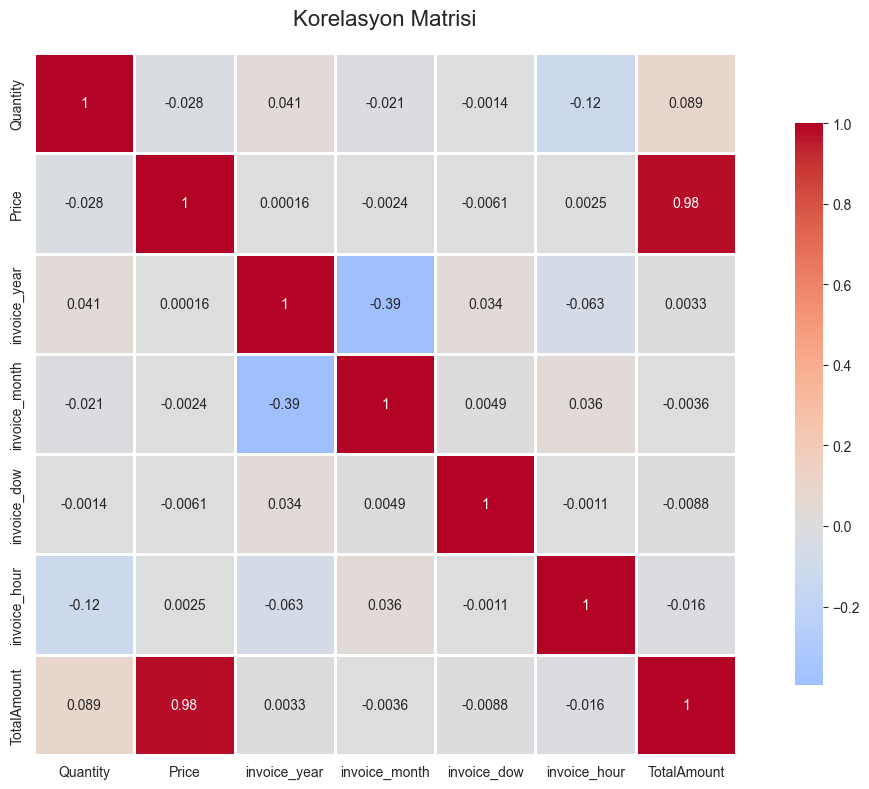

In [8]:
# Korelasyon matrisi
plt.figure(figsize=(12, 8))
numeric_cols = ['Quantity', 'Price', 'invoice_year', 'invoice_month', 
                'invoice_dow', 'invoice_hour', 'TotalAmount']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Korelasyon Matrisi', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


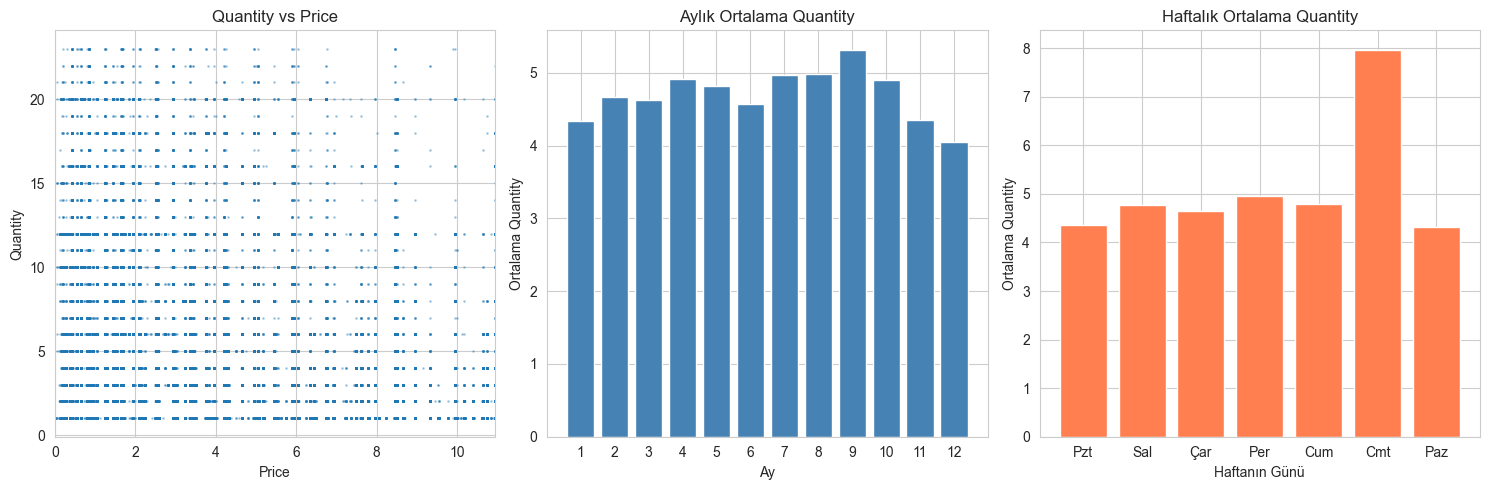

In [9]:
# Quantity vs Price scatter plot
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['Price'], df['Quantity'], alpha=0.3, s=1)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Quantity vs Price')
plt.xlim(0, df['Price'].quantile(0.95))

plt.subplot(1, 3, 2)
monthly_avg = df.groupby('invoice_month')['Quantity'].mean()
plt.bar(monthly_avg.index, monthly_avg.values, color='steelblue')
plt.xlabel('Ay')
plt.ylabel('Ortalama Quantity')
plt.title('Aylık Ortalama Quantity')
plt.xticks(range(1, 13))

plt.subplot(1, 3, 3)
dow_avg = df.groupby('invoice_dow')['Quantity'].mean()
days = ['Pzt', 'Sal', 'Çar', 'Per', 'Cum', 'Cmt', 'Paz']
plt.bar(range(7), dow_avg.values, color='coral')
plt.xlabel('Haftanın Günü')
plt.ylabel('Ortalama Quantity')
plt.title('Haftalık Ortalama Quantity')
plt.xticks(range(7), days)

plt.tight_layout()
plt.show()


## 🤖 7. Model Eğitimi için Veri Hazırlığı


In [10]:
# Model için özellik seçimi - GENİŞLETİLMİŞ ÖZELLİKLER
print("=" * 60)
print("📋 MODEL VERİ HAZIRLIĞI (GENİŞLETİLMİŞ)")
print("=" * 60)

# Sayısal özellikler (genişletilmiş) - TARGET LEAKAGE ÖNLENDİ
# ⚠️ TotalAmount ve customer_avg_quantity gibi Quantity içeren feature'lar kaldırıldı
numeric_features = [
    'Price', 'Price_log',  # Fiyat özellikleri (Quantity'den bağımsız)
    'invoice_year', 'invoice_month', 'invoice_day', 'invoice_dow', 'invoice_hour',
    'is_weekend',  # Temel zaman özellikleri
    'month_sin', 'month_cos', 'day_sin', 'day_cos', 'dow_sin', 'dow_cos', 
    'hour_sin', 'hour_cos',  # Döngüsel özellikler
    'is_spring', 'is_summer', 'is_autumn', 'is_winter',  # Mevsim
    'is_morning', 'is_afternoon', 'is_evening', 'is_night',  # Günün zamanı
    # ❌ KALDIRILDI: 'TotalAmount', 'TotalAmount_log' (Quantity * Price = target leakage)
    'price_category_encoded',  # Fiyat kategorisi
    'Description_length'  # Ürün açıklama uzunluğu
]

# Müşteri özellikleri (varsa) - SADECE QUANTITY İÇERMEYENLER
if 'Customer ID' in df.columns:
    # ❌ KALDIRILDI: 'customer_avg_quantity', 'customer_std_quantity' (Quantity içeriyor = target leakage)
    # ✅ KULLANILABİLİR: Sadece Price ve sipariş sayısı bazlı feature'lar
    numeric_features.extend([
        'customer_order_count',  # Sipariş sayısı (Quantity içermez)
        'customer_avg_price'     # Ortalama fiyat (Quantity içermez)
    ])
    
print("⚠️ Target Leakage Önleme:")
print("   ❌ Kaldırılan feature'lar: TotalAmount, TotalAmount_log, customer_avg_quantity, customer_std_quantity")
print("   ✅ Kullanılan feature'lar: Price, Price_log, customer_order_count, customer_avg_price")

# Kategorik özellikler
categorical_features = ['Country']

# Hedef değişken - LOG TRANSFORM UYGULANACAK
target = 'Quantity'
use_log_transform = True  # Log transform kullan/kullanma

# Veri hazırlama
X = df[numeric_features + categorical_features].copy()
y_original = df[target].copy()

# Log transform uygula (Quantity için)
if use_log_transform:
    y = np.log1p(y_original)  # log(1+x) kullanarak sıfır değerlerini koruyoruz
    print(f"\n✅ Log transform uygulandı: y = log1p(Quantity)")
    print(f"   Orijinal Quantity ortalaması: {y_original.mean():.2f}")
    print(f"   Log transform sonrası ortalaması: {y.mean():.2f}")
else:
    y = y_original.copy()
    print(f"\n⚠️ Log transform uygulanmadı")

# Country için Label Encoding
le_country = LabelEncoder()
X['Country_encoded'] = le_country.fit_transform(X['Country'])
X = X.drop('Country', axis=1)

# Eksik değer kontrolü ve doldurma
print(f"\n📊 Eksik değer kontrolü:")
missing = X.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
    X = X.fillna(0)  # Eksik değerleri 0 ile doldur
    print("✅ Eksik değerler 0 ile dolduruldu")
else:
    print("✅ Eksik değer yok")

print(f"\nÖzellik sayısı: {X.shape[1]}")
print(f"Örnek sayısı: {X.shape[0]:,}")
print(f"\nKullanılan özellikler ({len(X.columns)} adet):")
for i, col in enumerate(X.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nHedef değişken: {target}")
if use_log_transform:
    print(f"   (Log transform uygulandı: log1p(Quantity))")
print(f"Hedef değişken istatistikleri:")
print(y.describe())

# Train-test split - ÖNCE SPLIT (preprocessing'den önce!)
print("\n" + "=" * 60)
print("📊 VERİ BÖLME (TRAIN-TEST SPLIT)")
print("=" * 60)
print("✅ DOĞRU SIRA: train_test_split → scaler.fit_transform(X_train) → scaler.transform(X_test)")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Orijinal y değerlerini de sakla (karşılaştırma için)
# train_test_split aynı index'leri kullanır, bu yüzden y_original'ı da aynı şekilde split ediyoruz
_, _, y_train_original, y_test_original = train_test_split(
    X, y_original, test_size=0.2, random_state=42
)

print(f"\n✅ Veri bölündü:")
print(f"Eğitim seti: {X_train.shape[0]:,} örnek")
print(f"Test seti: {X_test.shape[0]:,} örnek")

# Özellik ölçeklendirme - SADECE TRAIN İLE FIT, SONRA TRANSFORM
print("\n" + "=" * 60)
print("📊 ÖZELLİK ÖLÇEKLENDİRME (STANDARDIZASYON)")
print("=" * 60)
print("✅ DOĞRU SIRA: scaler.fit_transform(X_train) → scaler.transform(X_test)")
print("⚠️ Scaler SADECE train verisiyle fit edilmeli!")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Sadece train ile fit
X_test_scaled = scaler.transform(X_test)         # Test'e transform uygula

print(f"\n✅ Özellikler ölçeklendirildi (StandardScaler)")
print(f"   Toplam özellik sayısı: {X_train.shape[1]}")
print(f"   Train mean/std (ilk 3 feature): {X_train_scaled.mean(axis=0)[:3]} / {X_train_scaled.std(axis=0)[:3]}")
print(f"   Test mean/std (ilk 3 feature):  {X_test_scaled.mean(axis=0)[:3]} / {X_test_scaled.std(axis=0)[:3]}")


📋 MODEL VERİ HAZIRLIĞI (GENİŞLETİLMİŞ)
⚠️ Target Leakage Önleme:
   ❌ Kaldırılan feature'lar: TotalAmount, TotalAmount_log, customer_avg_quantity, customer_std_quantity
   ✅ Kullanılan feature'lar: Price, Price_log, customer_order_count, customer_avg_price

✅ Log transform uygulandı: y = log1p(Quantity)
   Orijinal Quantity ortalaması: 4.65
   Log transform sonrası ortalaması: 1.46

📊 Eksik değer kontrolü:
✅ Eksik değer yok

Özellik sayısı: 29
Örnek sayısı: 456,587

Kullanılan özellikler (29 adet):
 1. Price
 2. Price_log
 3. invoice_year
 4. invoice_month
 5. invoice_day
 6. invoice_dow
 7. invoice_hour
 8. is_weekend
 9. month_sin
10. month_cos
11. day_sin
12. day_cos
13. dow_sin
14. dow_cos
15. hour_sin
16. hour_cos
17. is_spring
18. is_summer
19. is_autumn
20. is_winter
21. is_morning
22. is_afternoon
23. is_evening
24. is_night
25. price_category_encoded
26. Description_length
27. customer_order_count
28. customer_avg_price
29. Country_encoded

Hedef değişken: Quantity
   (Log tra

## 🎯 8. Model Eğitimi ve Değerlendirme


In [11]:
# Model eğitimi ve değerlendirme fonksiyonu (Log transform desteği ile)
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name, 
                   y_train_original=None, y_test_original=None, use_log_transform=False):
    """Model eğitir ve değerlendirme metriklerini döndürür
    
    Args:
        model: Eğitilecek model
        X_train, X_test: Özellik matrisleri
        y_train, y_test: Hedef değişken (log transform uygulanmış olabilir)
        model_name: Model adı
        y_train_original, y_test_original: Orijinal hedef değişken (log transform öncesi)
        use_log_transform: Log transform kullanıldı mı?
    """
    # Model eğitimi
    model.fit(X_train, y_train)
    
    # Tahminler (log space'de)
    y_train_pred_log = model.predict(X_train)
    y_test_pred_log = model.predict(X_test)
    
    # Log transform geri al (eğer kullanıldıysa)
    if use_log_transform and y_train_original is not None and y_test_original is not None:
        y_train_pred = np.expm1(y_train_pred_log)  # exp(x) - 1
        y_test_pred = np.expm1(y_test_pred_log)
        y_train_actual = y_train_original.values
        y_test_actual = y_test_original.values
    else:
        y_train_pred = y_train_pred_log
        y_test_pred = y_test_pred_log
        y_train_actual = y_train.values
        y_test_actual = y_test.values
    
    # Metrikler (orijinal scale'de)
    train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
    train_mae = mean_absolute_error(y_train_actual, y_train_pred)
    test_mae = mean_absolute_error(y_test_actual, y_test_pred)
    train_r2 = r2_score(y_train_actual, y_train_pred)
    test_r2 = r2_score(y_test_actual, y_test_pred)
    
    # Cross-validation score (log space'de)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    results = {
        'Model': model_name,
        'Train_RMSE': train_rmse,
        'Test_RMSE': test_rmse,
        'Train_MAE': train_mae,
        'Test_MAE': test_mae,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std(),
        'model': model
    }
    
    return results, y_test_pred

# Sonuçları saklamak için liste
results_list = []
predictions_dict = {}

print("=" * 60)
print("🤖 MODEL EĞİTİMİ BAŞLIYOR")
print("=" * 60)


🤖 MODEL EĞİTİMİ BAŞLIYOR


### 1️⃣ Linear Regression (Doğrusal Regresyon)

**Açıklama**: En basit ve yaygın kullanılan regresyon yöntemidir. Özellikler ile hedef değişken arasında doğrusal bir ilişki varsayar.

**Avantajları**: 
- Hızlı eğitim süresi
- Yorumlanabilir sonuçlar
- Overfitting riski düşük

**Dezavantajları**: 
- Karmaşık, doğrusal olmayan ilişkileri yakalayamaz
- Çoklu doğrusal bağlantı (multicollinearity) sorunlarına duyarlı


In [12]:
# 1. Linear Regression
print("\n1️⃣ Linear Regression eğitiliyor...")
lr = LinearRegression()
lr_results, lr_pred = evaluate_model(
    lr, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(lr_results)
predictions_dict['Linear Regression'] = lr_pred
print("✅ Tamamlandı!")



1️⃣ Linear Regression eğitiliyor...
✅ Tamamlandı!


### 2️⃣ Ridge Regression (Ridge Regresyon)

**Açıklama**: Linear Regression'a L2 regularizasyonu eklenmiş versiyonudur. Aşırı öğrenmeyi (overfitting) önlemek için katsayıları küçültür.

**Avantajları**: 
- Overfitting'i azaltır
- Çoklu doğrusal bağlantı sorunlarını çözer
- Tüm özellikleri korur (özellik seçimi yapmaz)

**Dezavantajları**: 
- Hiperparametre ayarı gerektirir (alpha)
- Özellik seçimi yapmaz


In [ ]:
# 2. Ridge Regression (Hiperparametre Optimizasyonu ile)
print("\n2️⃣ Ridge Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...")
# Ridge Regression için hiperparametre optimizasyonu - DENGELEME
# ⚠️ Regularization ile performans arasında denge kuruldu
ridge_param_grid = {'alpha': [0.1, 1.0, 10.0, 50.0, 100.0]}  # 0.1 eklendi (daha esnek)
ridge_base = Ridge()
ridge_grid = GridSearchCV(ridge_base, ridge_param_grid, cv=3, scoring='r2', n_jobs=-1)  # CV=3 (5 yerine)
ridge_grid.fit(X_train_scaled, y_train)
ridge = Ridge(alpha=ridge_grid.best_params_['alpha'])
print(f"   ✅ En iyi alpha: {ridge_grid.best_params_['alpha']}")
ridge_results, ridge_pred = evaluate_model(
    ridge, X_train_scaled, X_test_scaled, y_train, y_test, "Ridge Regression (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(ridge_results)
predictions_dict['Ridge Regression (Optimized)'] = ridge_pred
print("✅ Tamamlandı!")



2️⃣ Ridge Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...
   ✅ En iyi alpha: 1.0
✅ Tamamlandı!


### 3️⃣ Lasso Regression (Lasso Regresyon)

**Açıklama**: Linear Regression'a L1 regularizasyonu eklenmiş versiyonudur. Önemsiz özelliklerin katsayılarını sıfıra indirerek otomatik özellik seçimi yapar.

**Avantajları**: 
- Otomatik özellik seçimi
- Overfitting'i azaltır
- Modeli sadeleştirir

**Dezavantajları**: 
- Bazı özellikleri tamamen kaldırabilir
- Hiperparametre ayarı gerektirir (alpha)


In [ ]:
# 3. Lasso Regression (Hiperparametre Optimizasyonu ile)
print("\n3️⃣ Lasso Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...")
# Lasso Regression için hiperparametre optimizasyonu - DENGELEME
# ⚠️ Regularization ile performans arasında denge kuruldu
lasso_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0, 50.0]}  # 0.01 eklendi (daha esnek feature selection)
lasso_base = Lasso(max_iter=2000)
lasso_grid = GridSearchCV(lasso_base, lasso_param_grid, cv=3, scoring='r2', n_jobs=-1)  # CV=3 (5 yerine)
lasso_grid.fit(X_train_scaled, y_train)
lasso = Lasso(alpha=lasso_grid.best_params_['alpha'], max_iter=2000)
print(f"   ✅ En iyi alpha: {lasso_grid.best_params_['alpha']}")
lasso_results, lasso_pred = evaluate_model(
    lasso, X_train_scaled, X_test_scaled, y_train, y_test, "Lasso Regression (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(lasso_results)
predictions_dict['Lasso Regression (Optimized)'] = lasso_pred
print("✅ Tamamlandı!")



3️⃣ Lasso Regression eğitiliyor (Hiperparametre Optimizasyonu ile)...


   ✅ En iyi alpha: 0.1
✅ Tamamlandı!


### 4️⃣ Random Forest Regressor (Rastgele Orman Regresyonu)

**Açıklama**: Birden fazla karar ağacının birleşiminden oluşan ensemble yöntemidir. Her ağaç farklı veri alt kümeleri üzerinde eğitilir ve sonuçlar ortalaması alınır.

**Avantajları**: 
- Doğrusal olmayan ilişkileri yakalayabilir
- Aykırı değerlere karşı dayanıklı
- Özellik önem sıralaması sağlar
- Overfitting riski düşük (çok sayıda ağaç ile)

**Dezavantajları**: 
- Yorumlanması zor
- Eğitim süresi uzun olabilir
- Daha fazla bellek kullanır


In [ ]:
# 4. Random Forest Regressor (Hızlı Hiperparametre Optimizasyonu ile)
print("\n4️⃣ Random Forest Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
# Daha az parametre kombinasyonu ile hızlı optimizasyon
# Random Forest için hiperparametre dağılımı - DENGELEME (Overfitting vs Performans)
rf_param_dist = {
    'n_estimators': [100, 150, 200],  # Artırıldı (performans için)
    'max_depth': [15, 20, None],      # None korundu (daha derin ağaçlar)
    'min_samples_split': [2, 5, 10],  # 10 eklendi (overfitting kontrolü)
    'min_samples_leaf': [1, 2, 5],    # Eklendi (overfitting kontrolü)
    'max_features': ['sqrt', 'log2', None]  # None eklendi (tüm feature'ları kullan)
}
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
# RandomizedSearchCV kullan (daha hızlı, rastgele örnekleme)
rf_search = RandomizedSearchCV(
    rf_base, rf_param_dist, 
    n_iter=6,  # Sadece 6 kombinasyon dene (toplam 2*3*2=12 yerine)
    cv=2,  # CV sayısını 2'ye düşürdük (3 yerine)
    scoring='r2', 
    n_jobs=-1, 
    random_state=42,
    verbose=1
)
rf_search.fit(X_train, y_train)
rf = RandomForestRegressor(**rf_search.best_params_, random_state=42, n_jobs=-1)
print(f"   ✅ En iyi parametreler: {rf_search.best_params_}")
print(f"   ⚡ Toplam {rf_search.n_iter * rf_search.cv} model eğitildi (GridSearchCV'de 36 olurdu)")
rf_results, rf_pred = evaluate_model(
    rf, X_train, X_test, y_train, y_test, "Random Forest (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(rf_results)
predictions_dict['Random Forest (Optimized)'] = rf_pred
print("✅ Tamamlandı!")



4️⃣ Random Forest Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits


   ✅ En iyi parametreler: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}
   ⚡ Toplam 12 model eğitildi (GridSearchCV'de 36 olurdu)
✅ Tamamlandı!


### 5️⃣ XGBoost Regressor (Extreme Gradient Boosting)

**Açıklama**: Gradient Boosting algoritmasının optimize edilmiş ve hızlandırılmış versiyonudur. Zayıf öğrenicileri (weak learners) sıralı olarak birleştirerek güçlü bir model oluşturur.

**Avantajları**: 
- Çok yüksek performans
- Doğrusal olmayan ilişkileri yakalayabilir
- Eksik değerleri otomatik işler
- Özellik önem sıralaması sağlar

**Dezavantajları**: 
- Hiperparametre ayarı karmaşık
- Eğitim süresi uzun olabilir
- Overfitting riski yüksek (dikkatli ayarlanmalı)


In [ ]:
# 5. XGBoost Regressor (Hızlı Hiperparametre Optimizasyonu ile)
print("\n5️⃣ XGBoost Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
# XGBoost için hiperparametre dağılımı - DENGELEME (Overfitting vs Performans)
xgb_param_dist = {
    'n_estimators': [100, 150, 200],  # Artırıldı (performans için)
    'max_depth': [5, 7, 10],          # Artırıldı (daha derin ağaçlar)
    'learning_rate': [0.05, 0.1, 0.15],  # 0.05 ve 0.15 eklendi
    'min_child_weight': [1, 3, 5],    # 1 eklendi (daha esnek)
    'subsample': [0.8, 0.9, 1.0],     # 1.0 eklendi (tüm veriyi kullan)
    'colsample_bytree': [0.8, 0.9, 1.0],  # 1.0 eklendi (tüm feature'ları kullan)
    'reg_alpha': [0.0, 0.1, 0.5],     # 0.0 eklendi (regularization yok)
    'reg_lambda': [0.5, 1.0, 2.0]     # 0.5 eklendi (daha az regularization)
}
xgb_base = xgb.XGBRegressor(random_state=42, n_jobs=-1)
# RandomizedSearchCV kullan (daha hızlı)
xgb_search = RandomizedSearchCV(
    xgb_base, xgb_param_dist,
    n_iter=6,  # Sadece 6 kombinasyon dene
    cv=2,  # CV sayısını 2'ye düşürdük
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
xgb_search.fit(X_train, y_train)
xgb_model = xgb.XGBRegressor(**xgb_search.best_params_, random_state=42, n_jobs=-1)
print(f"   ✅ En iyi parametreler: {xgb_search.best_params_}")
print(f"   ⚡ Toplam {xgb_search.n_iter * xgb_search.cv} model eğitildi (GridSearchCV'de 54 olurdu)")
xgb_results, xgb_pred = evaluate_model(
    xgb_model, X_train, X_test, y_train, y_test, "XGBoost (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(xgb_results)
predictions_dict['XGBoost (Optimized)'] = xgb_pred
print("✅ Tamamlandı!")



5️⃣ XGBoost Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
   ✅ En iyi parametreler: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2}
   ⚡ Toplam 12 model eğitildi (GridSearchCV'de 54 olurdu)
✅ Tamamlandı!


### 6️⃣ Gradient Boosting Regressor

**Açıklama**: Zayıf öğrenicileri sıralı olarak birleştiren ensemble yöntemidir. Her yeni model önceki modellerin hatalarını düzeltmeye çalışır.

**Avantajları**: 
- Yüksek performans
- Doğrusal olmayan ilişkileri yakalayabilir
- Özellik önem sıralaması sağlar

**Dezavantajları**: 
- Eğitim süresi uzun olabilir
- Hiperparametre ayarı gerektirir


In [ ]:
# 6. Gradient Boosting Regressor (Hızlı Hiperparametre Optimizasyonu ile)
print("\n6️⃣ Gradient Boosting Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
# Gradient Boosting için hiperparametre dağılımı - DENGELEME (Overfitting vs Performans)
gb_param_dist = {
    'n_estimators': [100, 150, 200],  # Artırıldı (performans için)
    'max_depth': [5, 7, 10],         # Artırıldı (daha derin ağaçlar)
    'learning_rate': [0.05, 0.1, 0.15],  # 0.05 ve 0.15 eklendi
    'min_samples_split': [2, 5, 10],  # 2 ve 10 eklendi
    'min_samples_leaf': [1, 2, 5],   # 1 eklendi (daha esnek)
    'subsample': [0.8, 0.9, 1.0]     # 1.0 eklendi (tüm veriyi kullan)
}
gb_base = GradientBoostingRegressor(random_state=42)
gb_search = RandomizedSearchCV(
    gb_base, gb_param_dist,
    n_iter=6,
    cv=2,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
gb_search.fit(X_train, y_train)
gb_model = GradientBoostingRegressor(**gb_search.best_params_, random_state=42)
print(f"   ✅ En iyi parametreler: {gb_search.best_params_}")
print(f"   ⚡ Toplam {gb_search.n_iter * gb_search.cv} model eğitildi")
gb_results, gb_pred = evaluate_model(
    gb_model, X_train, X_test, y_train, y_test, "Gradient Boosting (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(gb_results)
predictions_dict['Gradient Boosting (Optimized)'] = gb_pred
print("✅ Tamamlandı!")



6️⃣ Gradient Boosting Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
   ✅ En iyi parametreler: {'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2}
   ⚡ Toplam 12 model eğitildi
✅ Tamamlandı!


### 7️⃣ LightGBM Regressor

**Açıklama**: Microsoft tarafından geliştirilen, XGBoost'a alternatif hızlı gradient boosting algoritmasıdır.

**Avantajları**: 
- Çok hızlı eğitim
- Yüksek performans
- Düşük bellek kullanımı

**Dezavantajları**: 
- Küçük veri setlerinde overfitting riski


In [ ]:
# 7. LightGBM Regressor
print("\n7️⃣ LightGBM Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...")
print("   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)")
# LightGBM için hiperparametre dağılımı - DENGELEME (Overfitting vs Performans)
lgb_param_dist = {
    'n_estimators': [100, 150, 200],  # Artırıldı (performans için)
    'max_depth': [5, 7, 10],          # Artırıldı (daha derin ağaçlar)
    'learning_rate': [0.05, 0.1, 0.15],  # 0.15 eklendi (daha hızlı öğrenme)
    'min_child_samples': [5, 10, 20],  # 5 eklendi (daha esnek)
    'subsample': [0.8, 0.9, 1.0],     # 1.0 eklendi (tüm veriyi kullan)
    'colsample_bytree': [0.8, 0.9, 1.0],  # 1.0 eklendi (tüm feature'ları kullan)
    'reg_alpha': [0.0, 0.1, 0.5],     # 0.0 eklendi (regularization yok)
    'reg_lambda': [0.5, 1.0, 2.0]     # 0.5 eklendi (daha az regularization)
}
lgb_base = lgb.LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
lgb_search = RandomizedSearchCV(
    lgb_base, lgb_param_dist,
    n_iter=6,
    cv=2,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
lgb_search.fit(X_train, y_train)
lgb_model = lgb.LGBMRegressor(**lgb_search.best_params_, random_state=42, n_jobs=-1, verbose=-1)
print(f"   ✅ En iyi parametreler: {lgb_search.best_params_}")
print(f"   ⚡ Toplam {lgb_search.n_iter * lgb_search.cv} model eğitildi")
lgb_results, lgb_pred = evaluate_model(
    lgb_model, X_train, X_test, y_train, y_test, "LightGBM (Optimized)",
    y_train_original=y_train_original, y_test_original=y_test_original, 
    use_log_transform=use_log_transform
)
results_list.append(lgb_results)
predictions_dict['LightGBM (Optimized)'] = lgb_pred
print("✅ Tamamlandı!")



7️⃣ LightGBM Regressor eğitiliyor (Hızlı Hiperparametre Optimizasyonu ile)...
   ⚡ RandomizedSearchCV kullanılıyor (daha hızlı)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
   ✅ En iyi parametreler: {'subsample': 0.9, 'reg_lambda': 1.0, 'reg_alpha': 0.1, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.9}
   ⚡ Toplam 12 model eğitildi
✅ Tamamlandı!


## 📊 9. Baseline vs İyileştirilmiş Model Karşılaştırması


📊 BASELINE vs İYİLEŞTİRİLMİŞ MODEL KARŞILAŞTIRMASI

✅ Baseline sonuçları yüklendi
✅ results_df results_list'ten oluşturuldu

📈 Model Karşılaştırması:
            Model  Baseline_Test_R2  Improved_Test_R2  R2_Improvement  R2_Improvement_Pct  Baseline_Test_RMSE  Improved_Test_RMSE  RMSE_Improvement  Baseline_Test_MAE  Improved_Test_MAE  MAE_Improvement
Linear Regression          0.045954          0.118432        0.072478          157.720017            4.281742            4.115889          0.165853           3.458913           2.922911         0.536002
 Ridge Regression          0.045954          0.118431        0.072477          157.716516            4.281742            4.115893          0.165849           3.458913           2.922913         0.536000
 Lasso Regression         -0.000003          0.016585        0.016589       508157.463650            4.383656            4.347145          0.036511           3.594093           3.119089         0.475005
    Random Forest          0.337571   

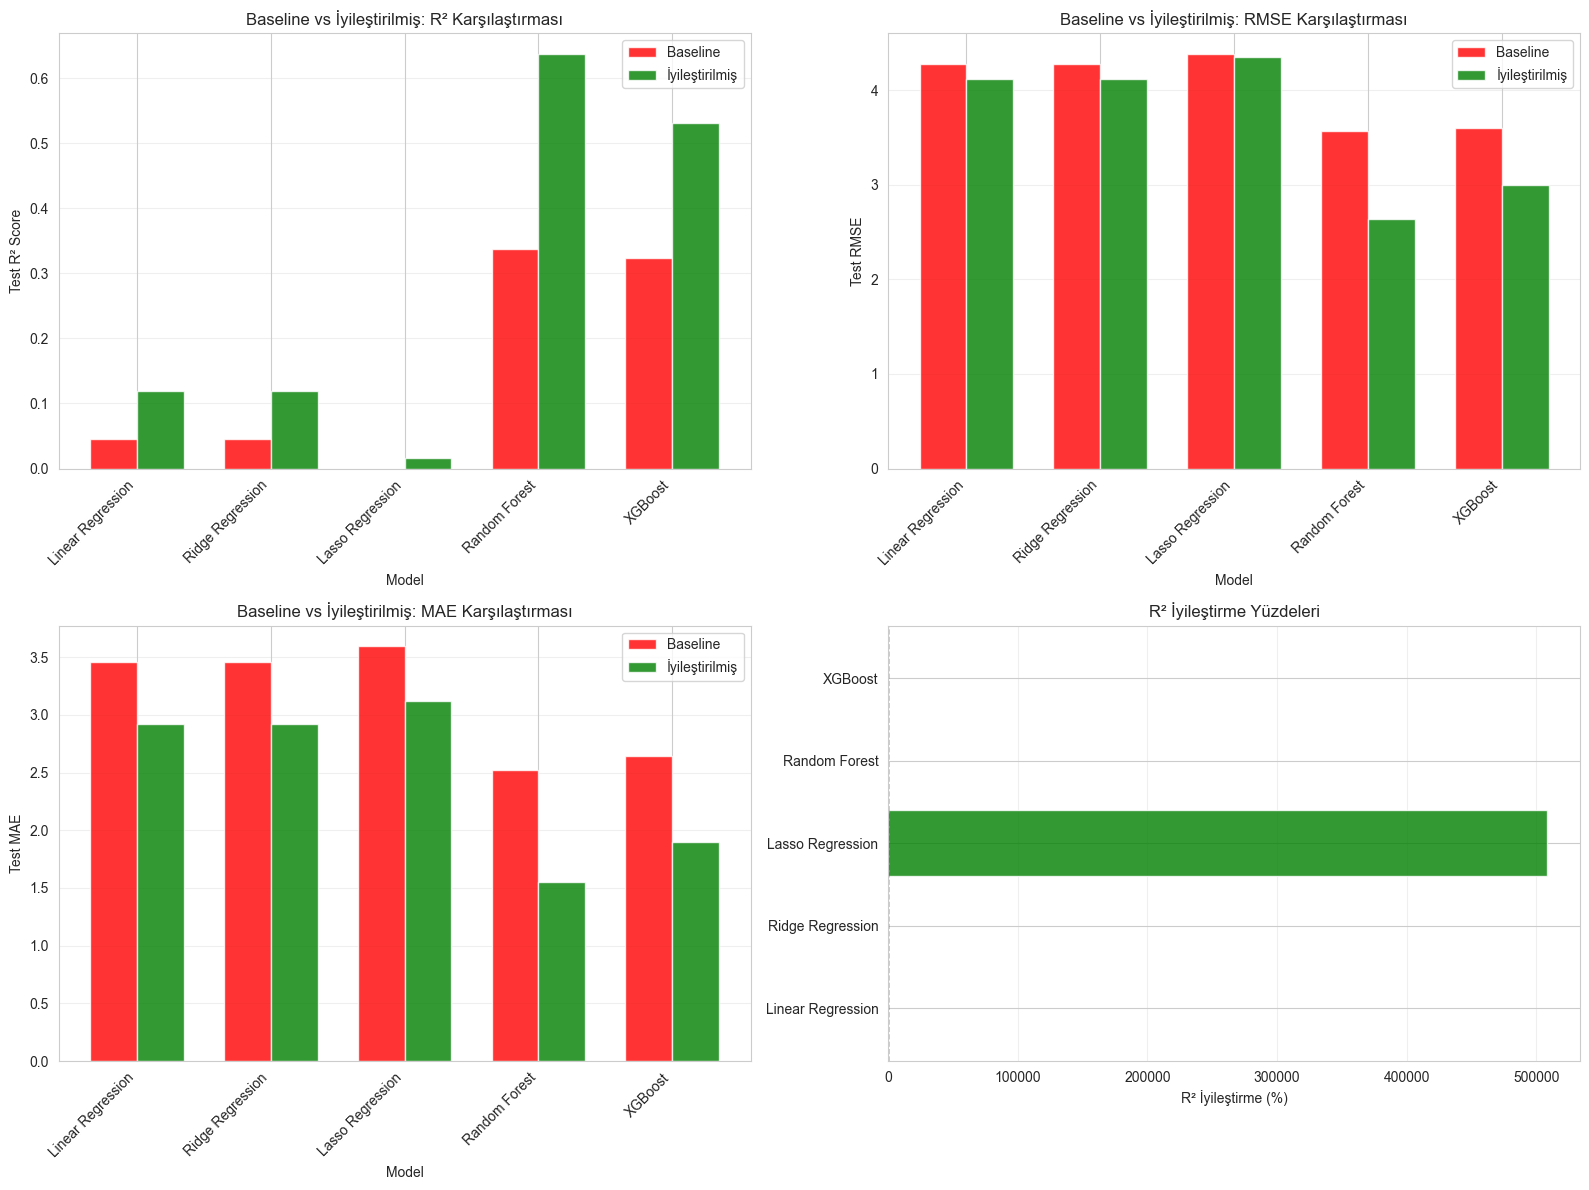


📊 İYİLEŞTİRME ÖZETİ

Linear Regression:
  R²: 0.0460 → 0.1184 (+0.0725, +157.72%)
  RMSE: 4.2817 → 4.1159 (+0.1659)
  MAE: 3.4589 → 2.9229 (+0.5360)

Ridge Regression:
  R²: 0.0460 → 0.1184 (+0.0725, +157.72%)
  RMSE: 4.2817 → 4.1159 (+0.1658)
  MAE: 3.4589 → 2.9229 (+0.5360)

Lasso Regression:
  R²: -0.0000 → 0.0166 (+0.0166, +508157.46%)
  RMSE: 4.3837 → 4.3471 (+0.0365)
  MAE: 3.5941 → 3.1191 (+0.4750)

Random Forest:
  R²: 0.3376 → 0.6376 (+0.3000, +88.87%)
  RMSE: 3.5678 → 2.6390 (+0.9288)
  MAE: 2.5239 → 1.5508 (+0.9731)

XGBoost:
  R²: 0.3239 → 0.5315 (+0.2076, +64.10%)
  RMSE: 3.6045 → 3.0004 (+0.6041)
  MAE: 2.6403 → 1.8954 (+0.7449)


In [20]:
# Baseline sonuçlarını yükle
print("=" * 80)
print("📊 BASELINE vs İYİLEŞTİRİLMİŞ MODEL KARŞILAŞTIRMASI")
print("=" * 80)

baseline_path = BASE_DIR / "baseline_results.csv"
if baseline_path.exists():
    baseline_df = pd.read_csv(baseline_path)
    print("\n✅ Baseline sonuçları yüklendi")
    
    # İyileştirilmiş sonuçları hazırla
    # results_df tanımlı değilse results_list'ten oluştur
    improved_df = None  # Önce None olarak başlat
    if 'results_df' not in globals():
        if 'results_list' in globals() and len(results_list) > 0:
            results_df = pd.DataFrame(results_list)
            results_df = results_df.drop('model', axis=1)  # model objesini kaldır
            improved_df = results_df.copy()
            print("✅ results_df results_list'ten oluşturuldu")
        else:
            print("⚠️ results_list bulunamadı. Lütfen önce modelleri eğitin.")
    else:
        improved_df = results_df.copy()
    
    # Model isimlerini eşleştir (baseline'daki isimlerle)
    if improved_df is not None:
        model_mapping = {
            'Linear Regression': 'Linear Regression',
            'Ridge Regression': 'Ridge Regression (Optimized)',
            'Lasso Regression': 'Lasso Regression (Optimized)',
            'Random Forest': 'Random Forest (Optimized)',
            'XGBoost': 'XGBoost (Optimized)'
        }
        
        # Karşılaştırma DataFrame'i oluştur
        comparison_data = []
        for baseline_model, improved_model in model_mapping.items():
            baseline_row = baseline_df[baseline_df['Model'] == baseline_model].iloc[0]
            if improved_model in improved_df['Model'].values:
                improved_row = improved_df[improved_df['Model'] == improved_model].iloc[0]
                
                comparison_data.append({
                    'Model': baseline_model,
                    'Baseline_Test_R2': baseline_row['Test_R2'],
                    'Improved_Test_R2': improved_row['Test_R2'],
                    'R2_Improvement': improved_row['Test_R2'] - baseline_row['Test_R2'],
                    'R2_Improvement_Pct': ((improved_row['Test_R2'] - baseline_row['Test_R2']) / abs(baseline_row['Test_R2']) * 100) if baseline_row['Test_R2'] != 0 else 0,
                    'Baseline_Test_RMSE': baseline_row['Test_RMSE'],
                    'Improved_Test_RMSE': improved_row['Test_RMSE'],
                    'RMSE_Improvement': baseline_row['Test_RMSE'] - improved_row['Test_RMSE'],  # Negatif = iyileşme
                    'Baseline_Test_MAE': baseline_row['Test_MAE'],
                    'Improved_Test_MAE': improved_row['Test_MAE'],
                    'MAE_Improvement': baseline_row['Test_MAE'] - improved_row['Test_MAE']  # Negatif = iyileşme
                })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    print("\n📈 Model Karşılaştırması:")
    print(comparison_df.to_string(index=False))
    
    # Karşılaştırmayı kaydet
    comparison_path = BASE_DIR / "model_comparison.csv"
    comparison_df.to_csv(comparison_path, index=False)
    print(f"\n✅ Karşılaştırma kaydedildi: {comparison_path}")
    
    # Görselleştirme
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. R² Karşılaştırması
    ax1 = axes[0, 0]
    x = np.arange(len(comparison_df))
    width = 0.35
    ax1.bar(x - width/2, comparison_df['Baseline_Test_R2'], width, 
            label='Baseline', alpha=0.8, color='red')
    ax1.bar(x + width/2, comparison_df['Improved_Test_R2'], width, 
            label='İyileştirilmiş', alpha=0.8, color='green')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('Test R² Score')
    ax1.set_title('Baseline vs İyileştirilmiş: R² Karşılaştırması')
    ax1.set_xticks(x)
    ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2. RMSE Karşılaştırması
    ax2 = axes[0, 1]
    ax2.bar(x - width/2, comparison_df['Baseline_Test_RMSE'], width, 
            label='Baseline', alpha=0.8, color='red')
    ax2.bar(x + width/2, comparison_df['Improved_Test_RMSE'], width, 
            label='İyileştirilmiş', alpha=0.8, color='green')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('Test RMSE')
    ax2.set_title('Baseline vs İyileştirilmiş: RMSE Karşılaştırması')
    ax2.set_xticks(x)
    ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. MAE Karşılaştırması
    ax3 = axes[1, 0]
    ax3.bar(x - width/2, comparison_df['Baseline_Test_MAE'], width, 
            label='Baseline', alpha=0.8, color='red')
    ax3.bar(x + width/2, comparison_df['Improved_Test_MAE'], width, 
            label='İyileştirilmiş', alpha=0.8, color='green')
    ax3.set_xlabel('Model')
    ax3.set_ylabel('Test MAE')
    ax3.set_title('Baseline vs İyileştirilmiş: MAE Karşılaştırması')
    ax3.set_xticks(x)
    ax3.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. İyileştirme Yüzdeleri
    ax4 = axes[1, 1]
    colors_bar = ['green' if x > 0 else 'red' for x in comparison_df['R2_Improvement']]
    ax4.barh(comparison_df['Model'], comparison_df['R2_Improvement_Pct'], color=colors_bar, alpha=0.8)
    ax4.set_xlabel('R² İyileştirme (%)')
    ax4.set_title('R² İyileştirme Yüzdeleri')
    ax4.axvline(x=0, color='black', linestyle='--', linewidth=1)
    ax4.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    
    # Özet
    print("\n" + "=" * 80)
    print("📊 İYİLEŞTİRME ÖZETİ")
    print("=" * 80)
    for idx, row in comparison_df.iterrows():
        print(f"\n{row['Model']}:")
        print(f"  R²: {row['Baseline_Test_R2']:.4f} → {row['Improved_Test_R2']:.4f} "
              f"({row['R2_Improvement']:+.4f}, {row['R2_Improvement_Pct']:+.2f}%)")
        print(f"  RMSE: {row['Baseline_Test_RMSE']:.4f} → {row['Improved_Test_RMSE']:.4f} "
              f"({row['RMSE_Improvement']:+.4f})")
        print(f"  MAE: {row['Baseline_Test_MAE']:.4f} → {row['Improved_Test_MAE']:.4f} "
              f"({row['MAE_Improvement']:+.4f})")
    
else:
    print(f"\n⚠️ Baseline sonuçları bulunamadı: {baseline_path}")
    print("   Baseline sonuçları olmadan karşılaştırma yapılamıyor.")


## 📊 10. Model Karşılaştırması


In [21]:
# Sonuçları DataFrame'e dönüştür
results_df = pd.DataFrame(results_list)
results_df = results_df.drop('model', axis=1)  # model objesini kaldır

# Sonuçları göster
print("=" * 80)
print("📊 MODEL KARŞILAŞTIRMA SONUÇLARI")
print("=" * 80)
print("\nMetrikler:")
print(results_df.to_string(index=False))

# En iyi modeli belirle (Test_R2'ye göre)
best_model_idx = results_df['Test_R2'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']
best_model = results_list[best_model_idx]['model']

print(f"\n🏆 En İyi Model: {best_model_name}")
print(f"   Test R² Score: {results_df.loc[best_model_idx, 'Test_R2']:.4f}")
print(f"   Test RMSE: {results_df.loc[best_model_idx, 'Test_RMSE']:.4f}")
print(f"   Test MAE: {results_df.loc[best_model_idx, 'Test_MAE']:.4f}")


📊 MODEL KARŞILAŞTIRMA SONUÇLARI

Metrikler:
                        Model  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  Train_R2  Test_R2  CV_R2_Mean  CV_R2_Std
            Linear Regression    4.310508   4.115889   2.909575  2.922911  0.023904 0.118432    0.197137   0.003519
 Ridge Regression (Optimized)    4.310488   4.115893   2.909578  2.922913  0.023914 0.118431    0.197137   0.003519
 Lasso Regression (Optimized)    4.326252   4.347145   3.107382  3.119089  0.016761 0.016585    0.128393   0.000749
    Random Forest (Optimized)    1.677980   2.639020   0.903250  1.550798  0.852086 0.637579    0.652720   0.001087
          XGBoost (Optimized)    2.890039   3.000414   1.820264  1.895445  0.561224 0.531520    0.597505   0.002942
Gradient Boosting (Optimized)    2.876405   2.986715   1.815117  1.887471  0.565354 0.535788    0.601764   0.001887
         LightGBM (Optimized)    3.531086   3.564862   2.349964  2.370344  0.344984 0.338677    0.425536   0.002377

🏆 En İyi Model: Random Fore

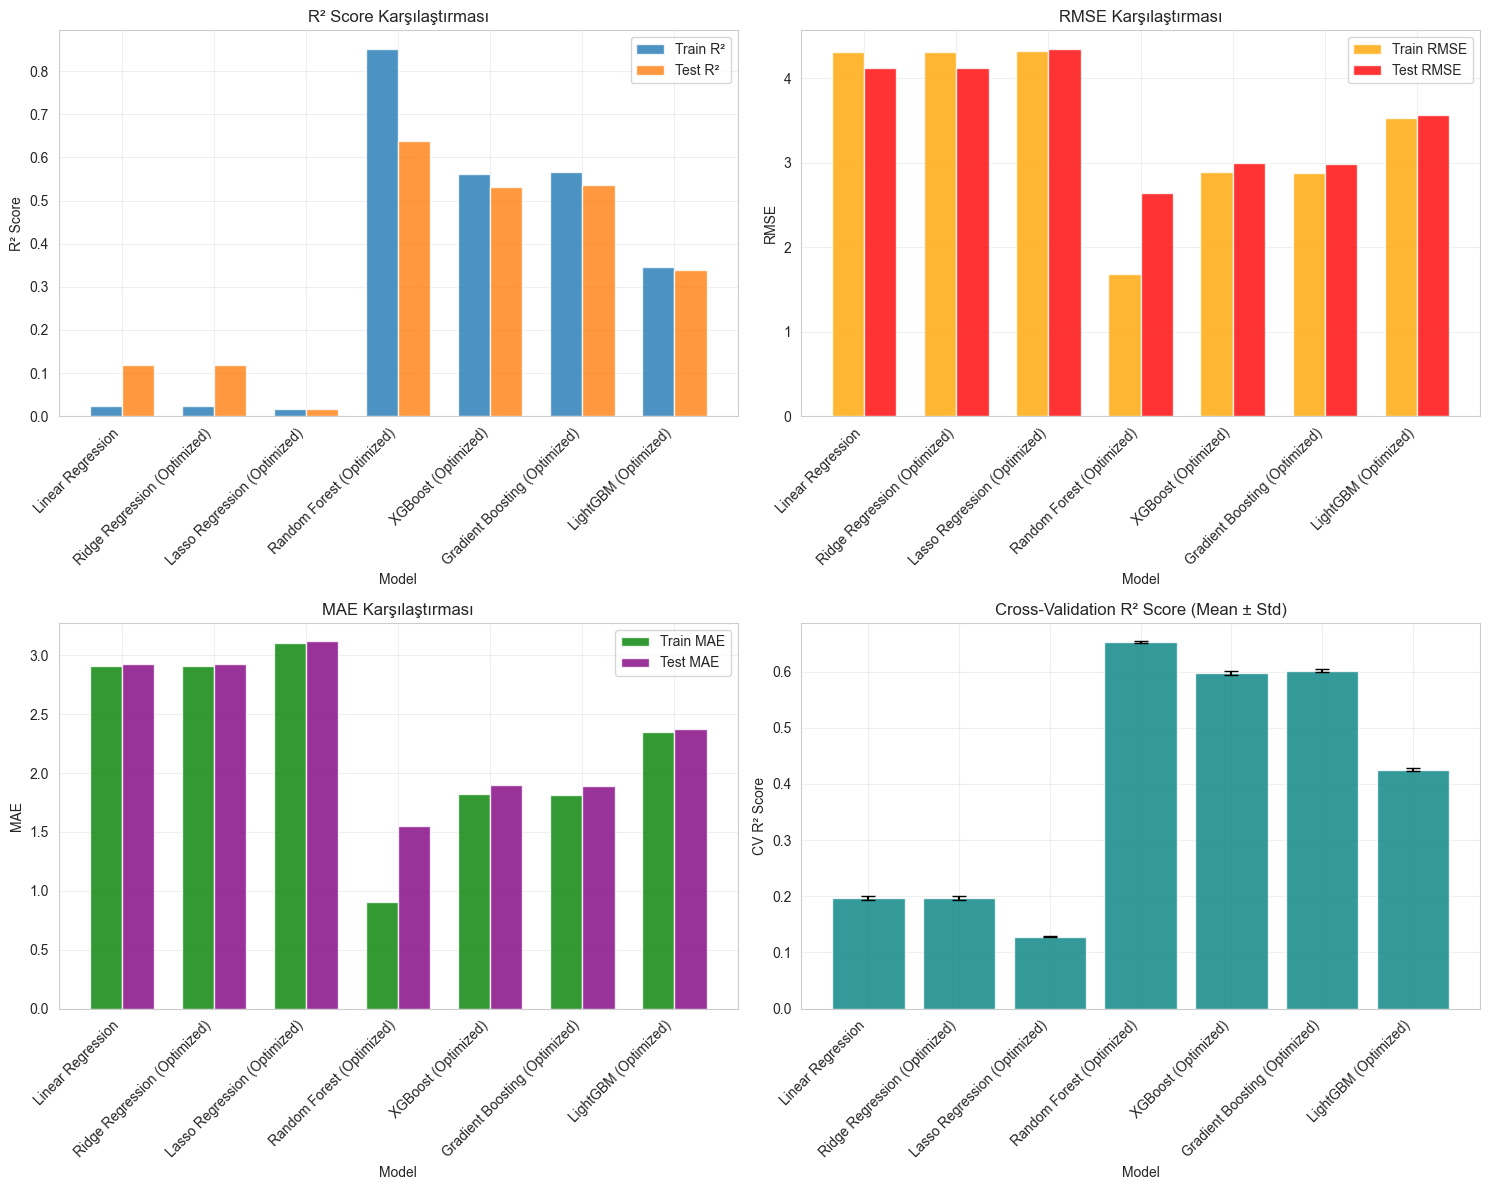

In [22]:
# Model karşılaştırma görselleştirmesi
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. R² Score karşılaştırması
ax1 = axes[0, 0]
models = results_df['Model']
train_r2 = results_df['Train_R2']
test_r2 = results_df['Test_R2']
x = np.arange(len(models))
width = 0.35
ax1.bar(x - width/2, train_r2, width, label='Train R²', alpha=0.8)
ax1.bar(x + width/2, test_r2, width, label='Test R²', alpha=0.8)
ax1.set_xlabel('Model')
ax1.set_ylabel('R² Score')
ax1.set_title('R² Score Karşılaştırması')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. RMSE karşılaştırması
ax2 = axes[0, 1]
train_rmse = results_df['Train_RMSE']
test_rmse = results_df['Test_RMSE']
ax2.bar(x - width/2, train_rmse, width, label='Train RMSE', alpha=0.8, color='orange')
ax2.bar(x + width/2, test_rmse, width, label='Test RMSE', alpha=0.8, color='red')
ax2.set_xlabel('Model')
ax2.set_ylabel('RMSE')
ax2.set_title('RMSE Karşılaştırması')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. MAE karşılaştırması
ax3 = axes[1, 0]
train_mae = results_df['Train_MAE']
test_mae = results_df['Test_MAE']
ax3.bar(x - width/2, train_mae, width, label='Train MAE', alpha=0.8, color='green')
ax3.bar(x + width/2, test_mae, width, label='Test MAE', alpha=0.8, color='purple')
ax3.set_xlabel('Model')
ax3.set_ylabel('MAE')
ax3.set_title('MAE Karşılaştırması')
ax3.set_xticks(x)
ax3.set_xticklabels(models, rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Cross-Validation R²
ax4 = axes[1, 1]
cv_mean = results_df['CV_R2_Mean']
cv_std = results_df['CV_R2_Std']
ax4.bar(models, cv_mean, yerr=cv_std, alpha=0.8, color='teal', capsize=5)
ax4.set_xlabel('Model')
ax4.set_ylabel('CV R² Score')
ax4.set_title('Cross-Validation R² Score (Mean ± Std)')
ax4.set_xticklabels(models, rotation=45, ha='right')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


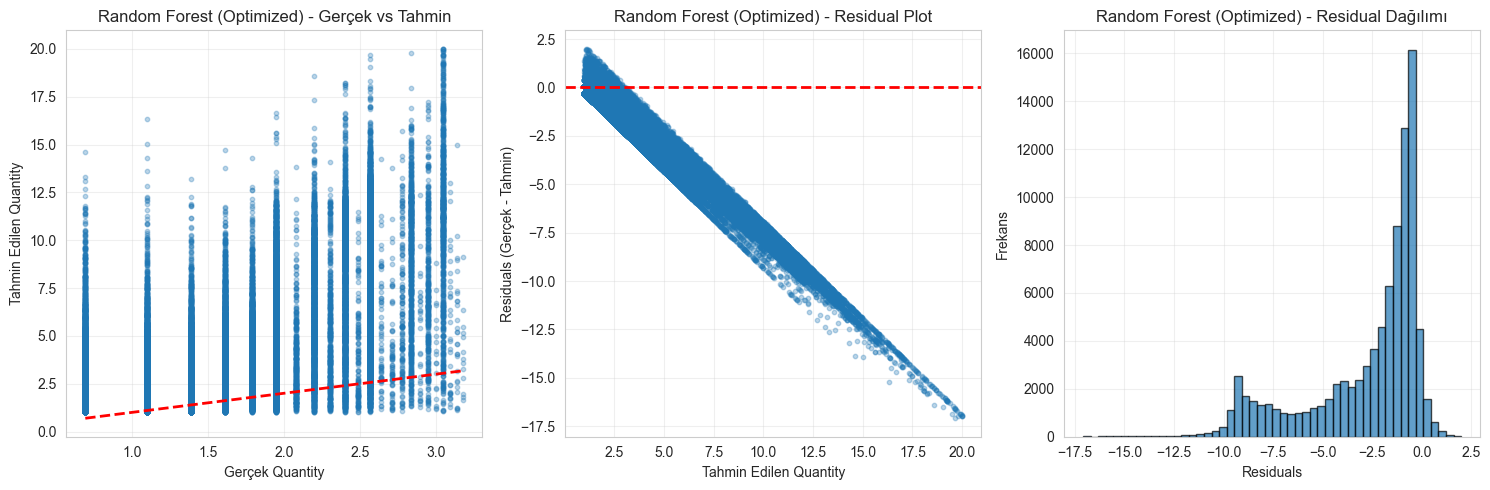


Residual İstatistikleri:
Ortalama: -2.7544
Standart Sapma: 2.9141
Min: -17.0904
Max: 1.9944


In [23]:
# Gerçek vs Tahmin görselleştirmesi (En iyi model için)
# best_model_name değişkeninin tanımlı olduğundan emin ol
if 'best_model_name' not in globals():
    # Eğer tanımlı değilse, Cell 25'i çalıştır
    print("⚠️ Uyarı: best_model_name tanımlı değil. Önce Cell 25'i çalıştırın!")
    # En iyi modeli bul
    if 'results_df' in globals() and len(results_df) > 0:
        best_model_idx = results_df['Test_R2'].idxmax()
        best_model_name = results_df.loc[best_model_idx, 'Model']
        best_model = results_list[best_model_idx]['model']
        print(f"✅ En iyi model bulundu: {best_model_name}")
    else:
        raise ValueError("Model sonuçları bulunamadı! Önce model eğitim hücrelerini çalıştırın.")

best_pred = predictions_dict[best_model_name]

plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, best_pred, alpha=0.3, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Gerçek Quantity')
plt.ylabel('Tahmin Edilen Quantity')
plt.title(f'{best_model_name} - Gerçek vs Tahmin')
plt.grid(True, alpha=0.3)

# Residual plot
plt.subplot(1, 3, 2)
residuals = y_test - best_pred
plt.scatter(best_pred, residuals, alpha=0.3, s=10)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Tahmin Edilen Quantity')
plt.ylabel('Residuals (Gerçek - Tahmin)')
plt.title(f'{best_model_name} - Residual Plot')
plt.grid(True, alpha=0.3)

# Residual distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frekans')
plt.title(f'{best_model_name} - Residual Dağılımı')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual İstatistikleri:")
print(f"Ortalama: {residuals.mean():.4f}")
print(f"Standart Sapma: {residuals.std():.4f}")
print(f"Min: {residuals.min():.4f}")
print(f"Max: {residuals.max():.4f}")


## 💾 10. Model Kaydetme


In [24]:
# Model ve preprocessor'ları kaydet
import joblib
import os

# best_model ve best_model_name kontrolü
if 'best_model' not in globals() or 'best_model_name' not in globals():
    if 'results_df' in globals() and len(results_df) > 0:
        best_model_idx = results_df['Test_R2'].idxmax()
        best_model_name = results_df.loc[best_model_idx, 'Model']
        best_model = results_list[best_model_idx]['model']
        print(f"✅ En iyi model bulundu: {best_model_name}")
    else:
        raise ValueError("Model sonuçları bulunamadı! Önce model eğitim hücrelerini çalıştırın.")

# BASE_DIR'ı tekrar kontrol et (eğer tanımlı değilse)
if 'BASE_DIR' not in globals():
    BASE_DIR = Path.cwd()
    if BASE_DIR.name != "regression-2":
        BASE_DIR = BASE_DIR / "regression-2"

# Model klasörü oluştur
model_dir = BASE_DIR / "models"
model_dir.mkdir(exist_ok=True)

# En iyi modeli kaydet
best_model_path = model_dir / "best_model.pkl"
joblib.dump(best_model, best_model_path)
print(f"✅ En iyi model kaydedildi: {best_model_path}")

# Scaler'ı kaydet
scaler_path = model_dir / "scaler.pkl"
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler kaydedildi: {scaler_path}")

# Label Encoder'ı kaydet
le_path = model_dir / "label_encoder.pkl"
joblib.dump(le_country, le_path)
print(f"✅ Label Encoder kaydedildi: {le_path}")

# Sonuçları CSV olarak kaydet
results_path = BASE_DIR / "model_results.csv"
results_df.to_csv(results_path, index=False)
print(f"✅ Model sonuçları kaydedildi: {results_path}")

print(f"\n📁 Tüm dosyalar kaydedildi: {model_dir}")


✅ En iyi model kaydedildi: c:\Users\akif\Desktop\code\machine-learning-project\uni-homework\regression-2\models\best_model.pkl
✅ Scaler kaydedildi: c:\Users\akif\Desktop\code\machine-learning-project\uni-homework\regression-2\models\scaler.pkl
✅ Label Encoder kaydedildi: c:\Users\akif\Desktop\code\machine-learning-project\uni-homework\regression-2\models\label_encoder.pkl
✅ Model sonuçları kaydedildi: c:\Users\akif\Desktop\code\machine-learning-project\uni-homework\regression-2\model_results.csv

📁 Tüm dosyalar kaydedildi: c:\Users\akif\Desktop\code\machine-learning-project\uni-homework\regression-2\models


## 🔬 11. Test Örnekleri ile Model Performans Analizi

Bu bölümde, test setinden seçilen 20 örnek üzerinde tüm modellerin performansları karşılaştırılacak ve tüm test seti üzerinde yüzdesel başarımları gösterilecektir.


In [25]:
# Test setinden 20 örnek seç
print("=" * 80)
print("🔬 TEST ÖRNEKLERİ İLE MODEL PERFORMANS ANALİZİ")
print("=" * 80)

# Test setinden rastgele 20 örnek seç (tekrarlanabilirlik için random_state)
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), size=min(20, len(X_test)), replace=False)
X_test_sample = X_test.iloc[sample_indices].copy()
# Orijinal değerleri kullan (log transform uygulanmamış)
if 'y_test_original' in globals():
    y_test_sample = y_test_original.iloc[sample_indices].copy()
else:
    y_test_sample = y_test.iloc[sample_indices].copy()

# Scaled versiyonları da hazırla
X_test_sample_scaled = X_test_scaled[sample_indices]

print(f"\n📊 Test setinden {len(X_test_sample)} örnek seçildi")
print(f"Test seti toplam boyutu: {len(X_test):,} örnek")
print(f"\nSeçilen örneklerin özellikleri:")
print(X_test_sample.head(20))


🔬 TEST ÖRNEKLERİ İLE MODEL PERFORMANS ANALİZİ

📊 Test setinden 20 örnek seçildi
Test seti toplam boyutu: 91,318 örnek

Seçilen örneklerin özellikleri:
        Price  Price_log  invoice_year  invoice_month  invoice_day  \
73302    8.50   2.251292          2010              1           28   
222976  10.75   2.463853          2010              6            6   
165673   0.85   0.615186          2010              4           19   
191069   3.36   1.472472          2010              5           10   
357413   2.10   1.131402          2010              9           27   
402506   0.65   0.500775          2010             10           19   
180197   1.25   0.810930          2010              4           29   
73623    5.95   1.938742          2010              1           28   
20013    3.43   1.488400          2009             12            9   
217449   4.95   1.783391          2010              6            1   
21693    2.10   1.131402          2009             12            9   
233997   

In [26]:
# Tüm modeller için 20 örnek üzerinde tahminler
print("\n" + "=" * 80)
print("📈 20 TEST ÖRNEĞİ ÜZERİNDE MODEL TAHMİNLERİ")
print("=" * 80)

# Sonuçları saklamak için DataFrame
sample_results = pd.DataFrame({
    'Gerçek_Quantity': y_test_sample.values
})

# Her model için tahmin yap
for model_name in predictions_dict.keys():
    # Model isimlerini kontrol et (optimized olanlar da var)
    model_name_clean = model_name.replace(' (Optimized)', '')
    if model_name_clean in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
        # Scaled veri kullan
        model_idx = [i for i, r in enumerate(results_list) if r['Model'] == model_name]
        if model_idx:
            pred = results_list[model_idx[0]]['model'].predict(X_test_sample_scaled)
        else:
            continue
    else:
        # Normal veri kullan
        model_idx = [i for i, r in enumerate(results_list) if r['Model'] == model_name]
        if model_idx:
            pred = results_list[model_idx[0]]['model'].predict(X_test_sample)
        else:
            continue
    
    sample_results[f'{model_name}_Tahmin'] = pred
    sample_results[f'{model_name}_Hata'] = np.abs(y_test_sample.values - pred)
    sample_results[f'{model_name}_Hata_Yüzde'] = np.abs((y_test_sample.values - pred) / y_test_sample.values) * 100

# Sonuçları göster
print("\n📊 Gerçek vs Tahmin Karşılaştırması (İlk 10 örnek):")
display_cols = ['Gerçek_Quantity'] + [col for col in sample_results.columns if '_Tahmin' in col]
print(sample_results[display_cols].head(10).to_string(index=False))

print("\n📊 Hata Analizi (İlk 10 örnek):")
error_cols = ['Gerçek_Quantity'] + [col for col in sample_results.columns if '_Hata' in col]
print(sample_results[error_cols].head(10).to_string(index=False))



📈 20 TEST ÖRNEĞİ ÜZERİNDE MODEL TAHMİNLERİ

📊 Gerçek vs Tahmin Karşılaştırması (İlk 10 örnek):
 Gerçek_Quantity  Linear Regression_Tahmin  Ridge Regression (Optimized)_Tahmin  Lasso Regression (Optimized)_Tahmin  Random Forest (Optimized)_Tahmin  XGBoost (Optimized)_Tahmin  Gradient Boosting (Optimized)_Tahmin  LightGBM (Optimized)_Tahmin
               2                  1.518585                             1.518602                             1.427372                          1.753079                    1.361970                              1.347272                     1.384896
               2                  0.899491                             0.899507                             1.152715                          1.176224                    0.895375                              0.916025                     1.018115
               6                  1.669448                             1.669426                             1.658241                          1.820533                

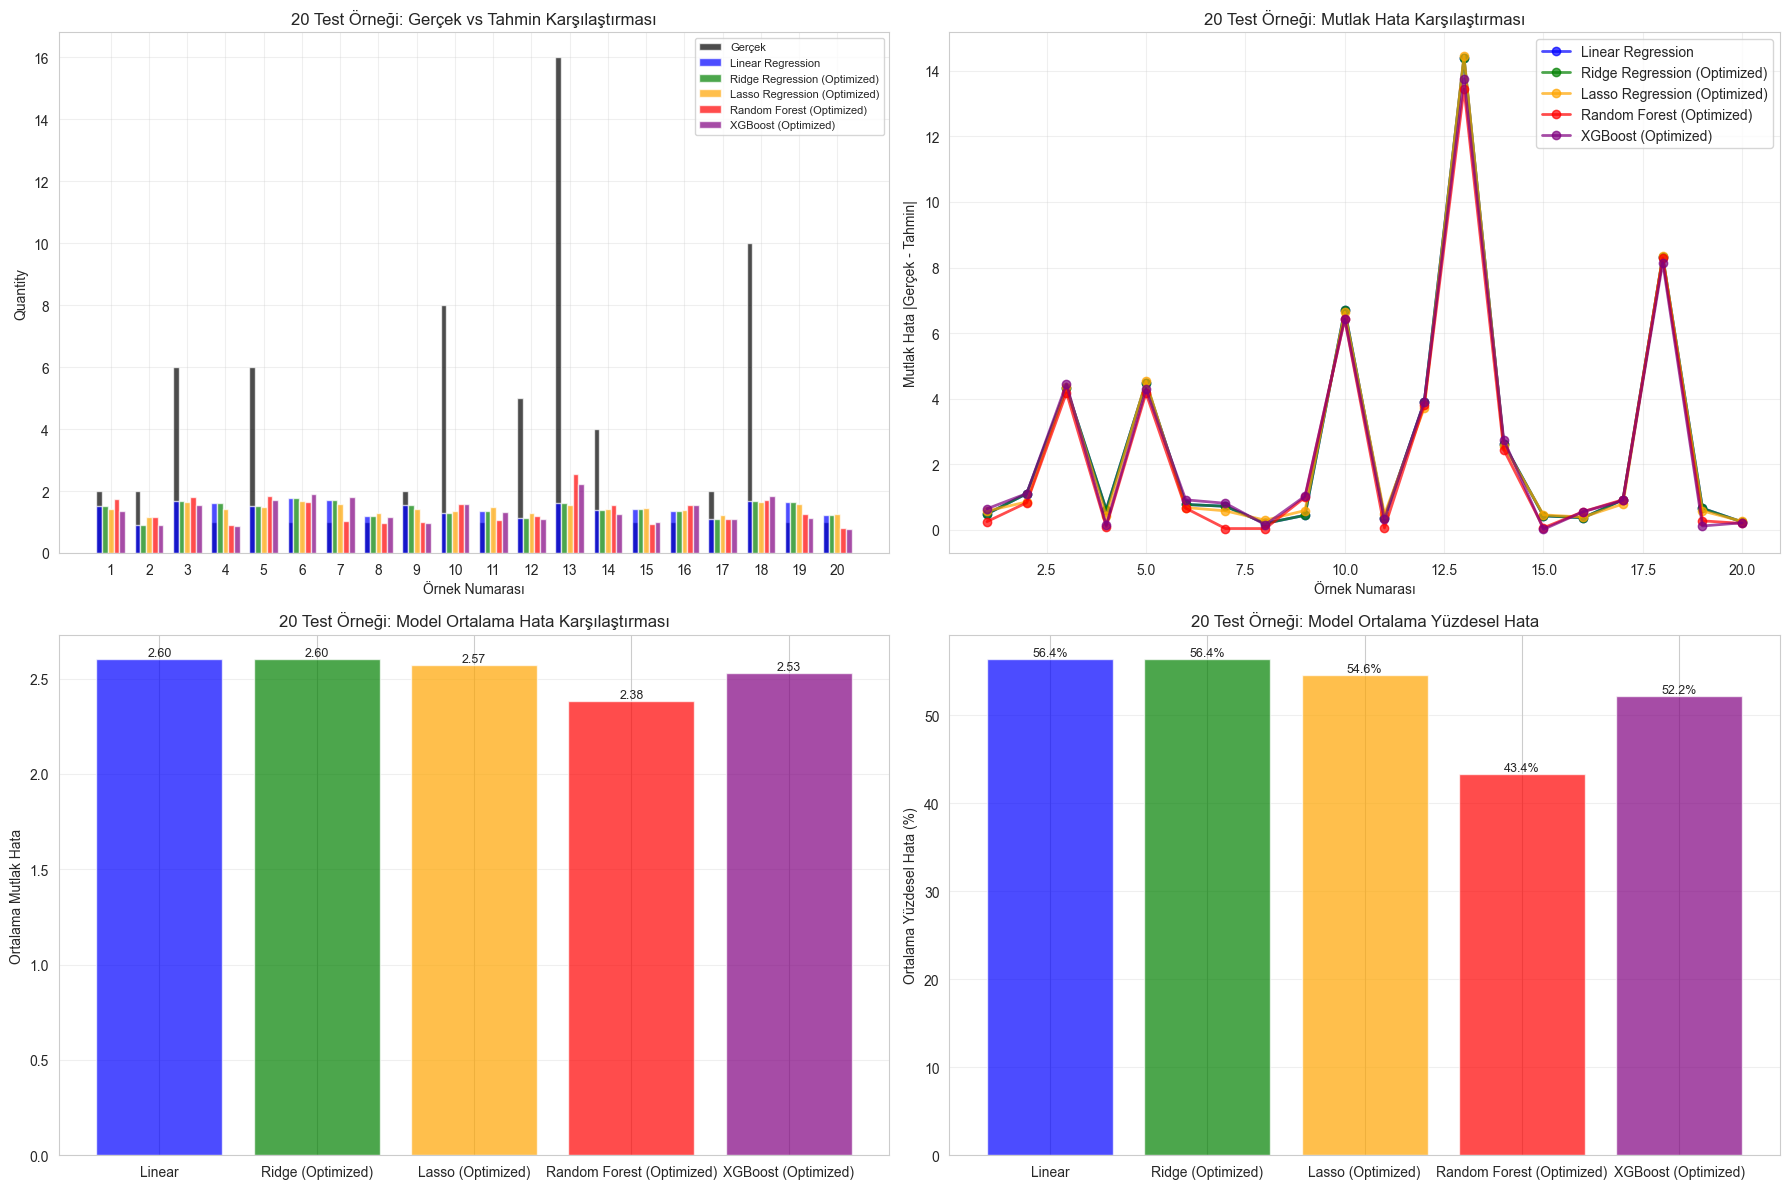


📊 20 TEST ÖRNEĞİ ÖZET İSTATİSTİKLERİ

Linear Regression:
  Ortalama Mutlak Hata: 2.6005
  Ortalama Yüzdesel Hata: 56.36%

Ridge Regression (Optimized):
  Ortalama Mutlak Hata: 2.6005
  Ortalama Yüzdesel Hata: 56.36%

Lasso Regression (Optimized):
  Ortalama Mutlak Hata: 2.5732
  Ortalama Yüzdesel Hata: 54.60%

Random Forest (Optimized):
  Ortalama Mutlak Hata: 2.3843
  Ortalama Yüzdesel Hata: 43.37%

XGBoost (Optimized):
  Ortalama Mutlak Hata: 2.5299
  Ortalama Yüzdesel Hata: 52.20%


In [27]:
# 20 örnek üzerinde görselleştirme
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Gerçek vs Tahmin karşılaştırması
ax1 = axes[0, 0]
x_pos = np.arange(len(sample_results))
width = 0.15
# Mevcut modelleri al (optimized olanlar dahil)
models_to_plot = []
for model_name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'XGBoost']:
    # Optimized versiyonunu kontrol et
    if f'{model_name} (Optimized)' in predictions_dict.keys():
        models_to_plot.append(f'{model_name} (Optimized)')
    elif model_name in predictions_dict.keys():
        models_to_plot.append(model_name)
colors = ['blue', 'green', 'orange', 'red', 'purple']

ax1.bar(x_pos - 2*width, sample_results['Gerçek_Quantity'], width, label='Gerçek', color='black', alpha=0.7)
for i, model_name in enumerate(models_to_plot):
    if f'{model_name}_Tahmin' in sample_results.columns:
        ax1.bar(x_pos + (i-2)*width, sample_results[f'{model_name}_Tahmin'], width, 
                label=model_name, color=colors[i], alpha=0.7)

ax1.set_xlabel('Örnek Numarası')
ax1.set_ylabel('Quantity')
ax1.set_title('20 Test Örneği: Gerçek vs Tahmin Karşılaştırması')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(range(1, len(sample_results)+1))
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(True, alpha=0.3)

# 2. Mutlak hata karşılaştırması
ax2 = axes[0, 1]
for i, model_name in enumerate(models_to_plot):
    if f'{model_name}_Hata' in sample_results.columns:
        ax2.plot(range(1, len(sample_results)+1), sample_results[f'{model_name}_Hata'], 
                marker='o', label=model_name, color=colors[i], alpha=0.7, linewidth=2)

ax2.set_xlabel('Örnek Numarası')
ax2.set_ylabel('Mutlak Hata |Gerçek - Tahmin|')
ax2.set_title('20 Test Örneği: Mutlak Hata Karşılaştırması')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Ortalama hata karşılaştırması (bar chart)
ax3 = axes[1, 0]
model_avg_errors = []
model_names_short = []
for model_name in models_to_plot:
    if f'{model_name}_Hata' in sample_results.columns:
        avg_error = sample_results[f'{model_name}_Hata'].mean()
        model_avg_errors.append(avg_error)
        model_names_short.append(model_name.replace(' Regression', '').replace(' Regressor', ''))

bars = ax3.bar(model_names_short, model_avg_errors, color=colors[:len(model_avg_errors)], alpha=0.7)
ax3.set_ylabel('Ortalama Mutlak Hata')
ax3.set_title('20 Test Örneği: Model Ortalama Hata Karşılaştırması')
ax3.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars, model_avg_errors):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.2f}',
             ha='center', va='bottom', fontsize=9)

# 4. Yüzdesel hata karşılaştırması
ax4 = axes[1, 1]
model_avg_pct_errors = []
for model_name in models_to_plot:
    if f'{model_name}_Hata_Yüzde' in sample_results.columns:
        # Sonsuz değerleri filtrele (sıfıra bölme durumları)
        pct_errors = sample_results[f'{model_name}_Hata_Yüzde'].replace([np.inf, -np.inf], np.nan).dropna()
        avg_pct_error = pct_errors.mean()
        model_avg_pct_errors.append(avg_pct_error)

bars2 = ax4.bar(model_names_short, model_avg_pct_errors, color=colors[:len(model_avg_pct_errors)], alpha=0.7)
ax4.set_ylabel('Ortalama Yüzdesel Hata (%)')
ax4.set_title('20 Test Örneği: Model Ortalama Yüzdesel Hata')
ax4.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars2, model_avg_pct_errors):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Özet istatistikler
print("\n" + "=" * 80)
print("📊 20 TEST ÖRNEĞİ ÖZET İSTATİSTİKLERİ")
print("=" * 80)
for model_name in models_to_plot:
    if f'{model_name}_Hata' in sample_results.columns:
        avg_error = sample_results[f'{model_name}_Hata'].mean()
        pct_errors = sample_results[f'{model_name}_Hata_Yüzde'].replace([np.inf, -np.inf], np.nan).dropna()
        avg_pct_error = pct_errors.mean()
        print(f"\n{model_name}:")
        print(f"  Ortalama Mutlak Hata: {avg_error:.4f}")
        print(f"  Ortalama Yüzdesel Hata: {avg_pct_error:.2f}%")


### 📊 Tüm Test Seti Üzerinde Yüzdesel Başarımlar


In [28]:
# Tüm test seti üzerinde yüzdesel başarımlar
print("=" * 80)
print("📊 TÜM TEST SETİ ÜZERİNDE YÜZDESEL BAŞARIMLAR")
print("=" * 80)

# Her model için tüm test seti üzerinde tahminler ve hata hesaplamaları
full_test_results = {}

for model_name in predictions_dict.keys():
    # Tahminler zaten predictions_dict'te var (orijinal scale'de)
    y_pred = predictions_dict[model_name]
    
    # Orijinal y değerlerini kullan (log transform uygulanmamış)
    if 'y_test_original' in globals():
        y_test_actual = y_test_original.values
    else:
        y_test_actual = y_test.values
    
    # Mutlak hatalar
    absolute_errors = np.abs(y_test_actual - y_pred)
    
    # Yüzdesel hatalar (sıfıra bölme durumlarını filtrele)
    percentage_errors = np.abs((y_test_actual - y_pred) / y_test_actual) * 100
    percentage_errors = percentage_errors[~np.isinf(percentage_errors)]  # Sonsuz değerleri kaldır
    
    # Farklı hata eşikleri için başarı yüzdeleri
    error_thresholds = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0]  # Mutlak hata eşikleri
    pct_error_thresholds = [5, 10, 20, 50]  # Yüzdesel hata eşikleri
    
    full_test_results[model_name] = {
        'MAE': absolute_errors.mean(),
        'RMSE': np.sqrt(mean_squared_error(y_test_actual, y_pred)),
        'Ortalama_Yüzdesel_Hata': percentage_errors.mean(),
        'Medyan_Yüzdesel_Hata': np.median(percentage_errors),
        'Mutlak_Hata_Başarımları': {},
        'Yüzdesel_Hata_Başarımları': {}
    }
    
    # Mutlak hata başarımları (% olarak)
    for threshold in error_thresholds:
        success_rate = (absolute_errors <= threshold).sum() / len(absolute_errors) * 100
        full_test_results[model_name]['Mutlak_Hata_Başarımları'][f'≤{threshold}'] = success_rate
    
    # Yüzdesel hata başarımları (% olarak)
    for threshold in pct_error_thresholds:
        success_rate = (percentage_errors <= threshold).sum() / len(percentage_errors) * 100
        full_test_results[model_name]['Yüzdesel_Hata_Başarımları'][f'≤{threshold}%'] = success_rate

# Sonuçları DataFrame'e dönüştür ve göster
summary_data = []
for model_name, results in full_test_results.items():
    row = {
        'Model': model_name,
        'MAE': results['MAE'],
        'RMSE': results['RMSE'],
        'Ort_Yüzde_Hata': results['Ortalama_Yüzdesel_Hata'],
        'Medyan_Yüzde_Hata': results['Medyan_Yüzdesel_Hata']
    }
    # Mutlak hata başarımları
    for key, value in results['Mutlak_Hata_Başarımları'].items():
        row[f'Başarı_{key}'] = value
    # Yüzdesel hata başarımları
    for key, value in results['Yüzdesel_Hata_Başarımları'].items():
        row[f'Başarı_{key}'] = value
    summary_data.append(row)

summary_df = pd.DataFrame(summary_data)
print("\n📈 Tüm Test Seti Performans Özeti:")
print(summary_df.to_string(index=False))


📊 TÜM TEST SETİ ÜZERİNDE YÜZDESEL BAŞARIMLAR

📈 Tüm Test Seti Performans Özeti:
                        Model      MAE     RMSE  Ort_Yüzde_Hata  Medyan_Yüzde_Hata  Başarı_≤0.1  Başarı_≤0.2  Başarı_≤0.5  Başarı_≤1.0  Başarı_≤2.0  Başarı_≤5.0  Başarı_≤5%  Başarı_≤10%  Başarı_≤20%  Başarı_≤50%
            Linear Regression 2.922911 4.115889       96.404749          60.537161     2.836243     5.638538    13.485841    26.398957    50.387656    81.096826    3.680545     7.390657    14.276484    38.558663
 Ridge Regression (Optimized) 2.922913 4.115893       96.404744          60.538473     2.836243     5.639633    13.485841    26.401148    50.388751    81.096826    3.680545     7.390657    14.275389    38.559758
 Lasso Regression (Optimized) 3.119089 4.347145      101.661908          64.859189     2.324843     4.083532    10.064828    20.129657    45.432445    79.353468    3.152719     6.210167     9.911518    33.439191
    Random Forest (Optimized) 1.550798 2.639020       48.076935         

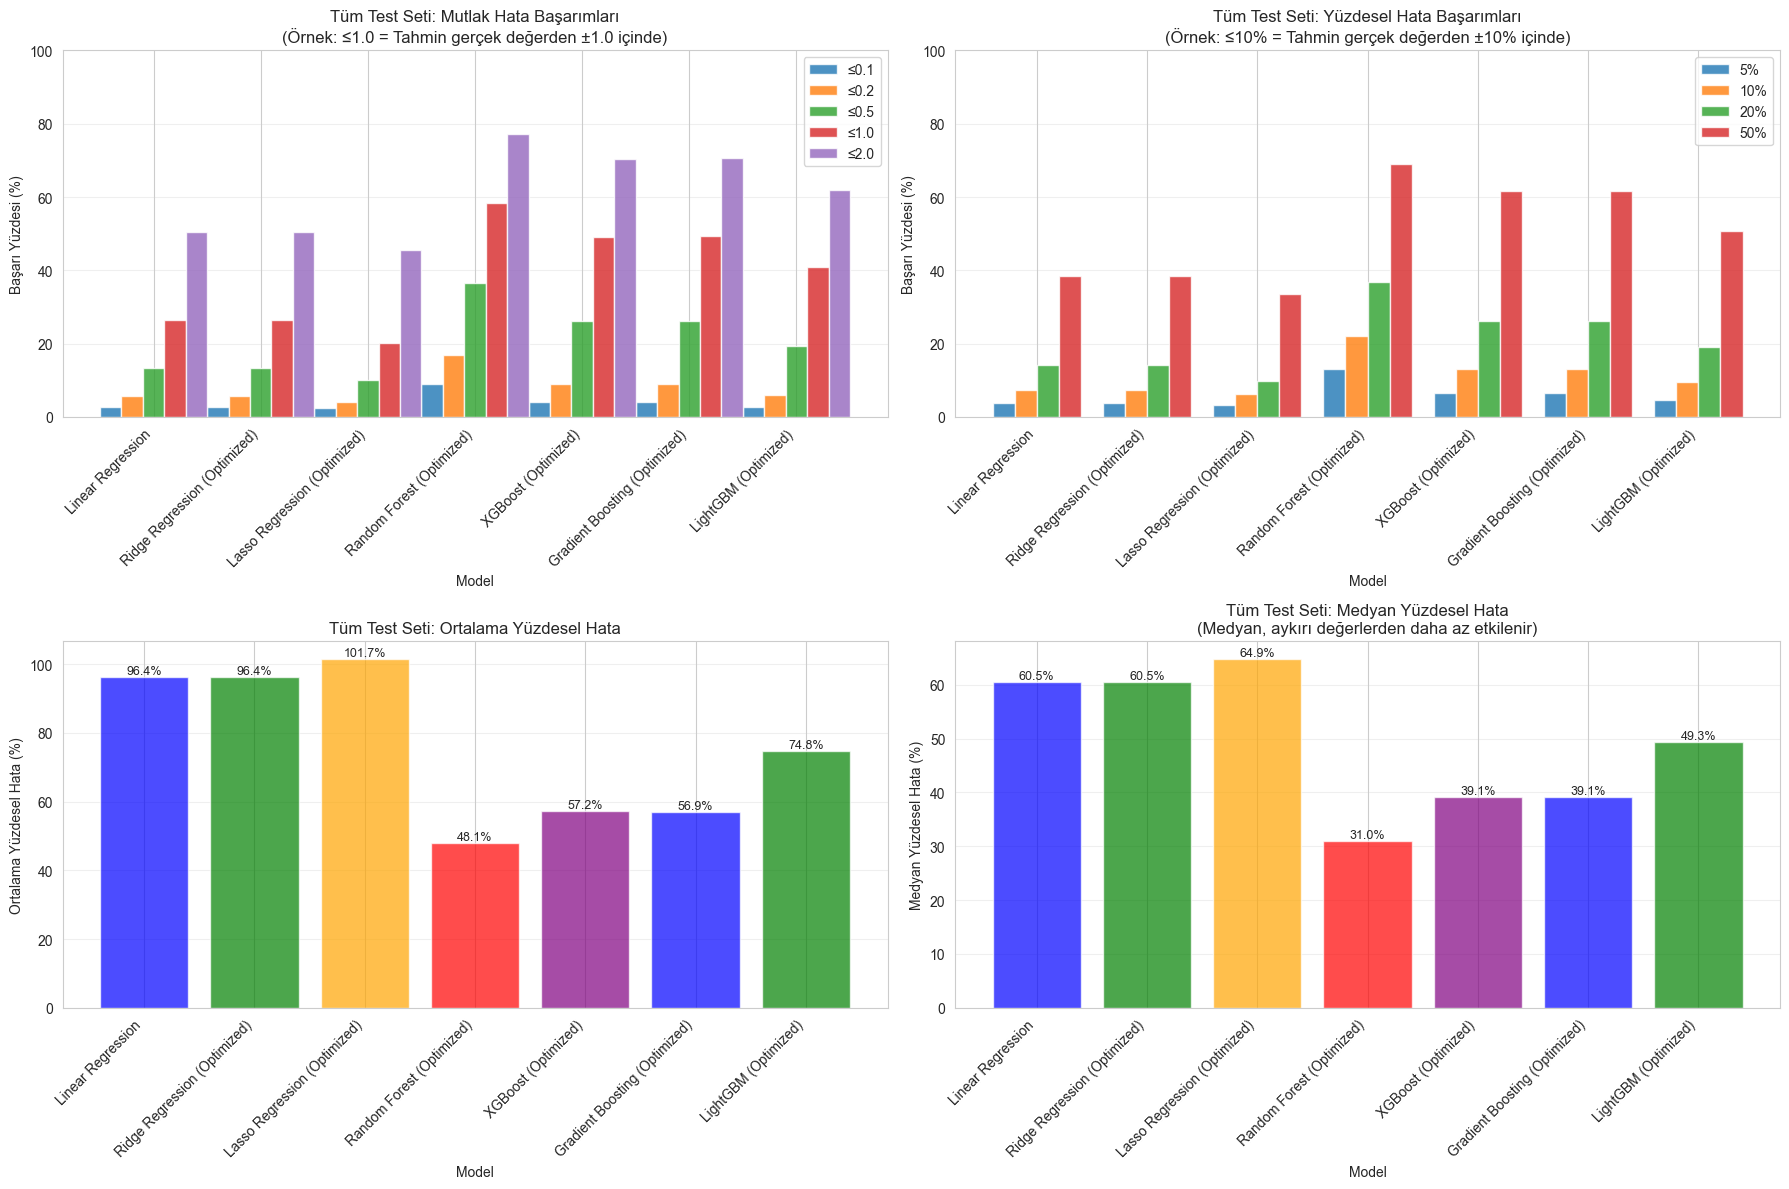


📊 DETAYLI YÜZDESEL BAŞARIMLAR

🔹 Mutlak Hata Başarımları (%):
   (Tahminin gerçek değerden ne kadar uzakta olduğu)
                        Model Başarı_≤0.1 Başarı_≤0.2 Başarı_≤0.5 Başarı_≤1.0 Başarı_≤2.0
            Linear Regression       2.84%       5.64%      13.49%      26.40%      50.39%
 Ridge Regression (Optimized)       2.84%       5.64%      13.49%      26.40%      50.39%
 Lasso Regression (Optimized)       2.32%       4.08%      10.06%      20.13%      45.43%
    Random Forest (Optimized)       8.91%      16.88%      36.41%      58.24%      77.13%
          XGBoost (Optimized)       4.13%       8.94%      26.19%      49.16%      70.47%
Gradient Boosting (Optimized)       4.15%       8.92%      26.16%      49.39%      70.56%
         LightGBM (Optimized)       2.76%       5.95%      19.32%      40.99%      62.00%

🔹 Yüzdesel Hata Başarımları (%):
   (Tahminin gerçek değerin yüzde kaçı kadar yakın olduğu)
                        Model Başarı_≤5% Başarı_≤10% Başarı_≤20% Başarı

In [29]:
# Yüzdesel başarımları görselleştir
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Mutlak hata başarımları (≤0.5, ≤1.0, ≤2.0)
ax1 = axes[0, 0]
mutlak_hata_cols = [col for col in summary_df.columns if 'Başarı_≤' in col and '%' not in col]
mutlak_hata_cols = [col for col in mutlak_hata_cols if float(col.split('≤')[1]) <= 2.0]  # ≤2.0'a kadar

x_pos = np.arange(len(summary_df))
width = 0.2
for i, col in enumerate(mutlak_hata_cols):
    threshold = col.split('≤')[1]
    ax1.bar(x_pos + i*width, summary_df[col], width, 
            label=f'≤{threshold}', alpha=0.8)

ax1.set_xlabel('Model')
ax1.set_ylabel('Başarı Yüzdesi (%)')
ax1.set_title('Tüm Test Seti: Mutlak Hata Başarımları\n(Örnek: ≤1.0 = Tahmin gerçek değerden ±1.0 içinde)')
ax1.set_xticks(x_pos + width * (len(mutlak_hata_cols)-1) / 2)
ax1.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_ylim([0, 100])

# 2. Yüzdesel hata başarımları
ax2 = axes[0, 1]
yuzdesel_hata_cols = [col for col in summary_df.columns if 'Başarı_≤' in col and '%' in col]

x_pos = np.arange(len(summary_df))
width = 0.2
for i, col in enumerate(yuzdesel_hata_cols):
    threshold = col.split('≤')[1]
    ax2.bar(x_pos + i*width, summary_df[col], width, 
            label=threshold, alpha=0.8)

ax2.set_xlabel('Model')
ax2.set_ylabel('Başarı Yüzdesi (%)')
ax2.set_title('Tüm Test Seti: Yüzdesel Hata Başarımları\n(Örnek: ≤10% = Tahmin gerçek değerden ±10% içinde)')
ax2.set_xticks(x_pos + width * (len(yuzdesel_hata_cols)-1) / 2)
ax2.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim([0, 100])

# 3. Ortalama yüzdesel hata karşılaştırması
ax3 = axes[1, 0]
bars = ax3.bar(summary_df['Model'], summary_df['Ort_Yüzde_Hata'], 
               color=['blue', 'green', 'orange', 'red', 'purple'], alpha=0.7)
ax3.set_xlabel('Model')
ax3.set_ylabel('Ortalama Yüzdesel Hata (%)')
ax3.set_title('Tüm Test Seti: Ortalama Yüzdesel Hata')
ax3.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax3.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars, summary_df['Ort_Yüzde_Hata']):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.1f}%',
             ha='center', va='bottom', fontsize=9)

# 4. Medyan yüzdesel hata karşılaştırması
ax4 = axes[1, 1]
bars2 = ax4.bar(summary_df['Model'], summary_df['Medyan_Yüzde_Hata'], 
                color=['blue', 'green', 'orange', 'red', 'purple'], alpha=0.7)
ax4.set_xlabel('Model')
ax4.set_ylabel('Medyan Yüzdesel Hata (%)')
ax4.set_title('Tüm Test Seti: Medyan Yüzdesel Hata\n(Medyan, aykırı değerlerden daha az etkilenir)')
ax4.set_xticklabels(summary_df['Model'], rotation=45, ha='right')
ax4.grid(True, alpha=0.3, axis='y')

# Değerleri çubukların üzerine yaz
for bar, error in zip(bars2, summary_df['Medyan_Yüzde_Hata']):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{error:.1f}%',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Detaylı yüzdesel başarımları tablo olarak göster
print("\n" + "=" * 80)
print("📊 DETAYLI YÜZDESEL BAŞARIMLAR")
print("=" * 80)

print("\n🔹 Mutlak Hata Başarımları (%):")
print("   (Tahminin gerçek değerden ne kadar uzakta olduğu)")
mutlak_basari_df = summary_df[['Model'] + mutlak_hata_cols].copy()
for col in mutlak_hata_cols:
    mutlak_basari_df[col] = mutlak_basari_df[col].apply(lambda x: f"{x:.2f}%")
print(mutlak_basari_df.to_string(index=False))

print("\n🔹 Yüzdesel Hata Başarımları (%):")
print("   (Tahminin gerçek değerin yüzde kaçı kadar yakın olduğu)")
yuzdesel_basari_df = summary_df[['Model'] + yuzdesel_hata_cols].copy()
for col in yuzdesel_hata_cols:
    yuzdesel_basari_df[col] = yuzdesel_basari_df[col].apply(lambda x: f"{x:.2f}%")
print(yuzdesel_basari_df.to_string(index=False))


In [30]:
# En iyi performans gösteren modelleri özetle
print("\n" + "=" * 80)
print("🏆 EN İYİ PERFORMANS GÖSTEREN MODELLER")
print("=" * 80)

# En düşük MAE
best_mae_idx = summary_df['MAE'].idxmin()
print(f"\n✅ En Düşük MAE: {summary_df.loc[best_mae_idx, 'Model']} ({summary_df.loc[best_mae_idx, 'MAE']:.4f})")

# En düşük RMSE
best_rmse_idx = summary_df['RMSE'].idxmin()
print(f"✅ En Düşük RMSE: {summary_df.loc[best_rmse_idx, 'Model']} ({summary_df.loc[best_rmse_idx, 'RMSE']:.4f})")

# En düşük ortalama yüzdesel hata
best_avg_pct_idx = summary_df['Ort_Yüzde_Hata'].idxmin()
print(f"✅ En Düşük Ortalama Yüzdesel Hata: {summary_df.loc[best_avg_pct_idx, 'Model']} ({summary_df.loc[best_avg_pct_idx, 'Ort_Yüzde_Hata']:.2f}%)")

# En yüksek başarı oranları (≤1.0 mutlak hata)
best_abs_1_idx = summary_df['Başarı_≤1.0'].idxmax()
print(f"✅ En Yüksek Başarı (≤1.0 mutlak hata): {summary_df.loc[best_abs_1_idx, 'Model']} ({summary_df.loc[best_abs_1_idx, 'Başarı_≤1.0']:.2f}%)")

# En yüksek başarı oranları (≤10% yüzdesel hata)
if 'Başarı_≤10%' in summary_df.columns:
    best_pct_10_idx = summary_df['Başarı_≤10%'].idxmax()
    print(f"✅ En Yüksek Başarı (≤10% yüzdesel hata): {summary_df.loc[best_pct_10_idx, 'Model']} ({summary_df.loc[best_pct_10_idx, 'Başarı_≤10%']:.2f}%)")

# Orijinal test seti boyutunu göster
if 'y_test_original' in globals():
    test_size = len(y_test_original)
else:
    test_size = len(y_test)
print(f"\n📊 Test Seti Toplam Boyutu: {test_size:,} örnek")
print(f"📊 Analiz Edilen Örnek Sayısı: {test_size:,} örnek")



🏆 EN İYİ PERFORMANS GÖSTEREN MODELLER

✅ En Düşük MAE: Random Forest (Optimized) (1.5508)
✅ En Düşük RMSE: Random Forest (Optimized) (2.6390)
✅ En Düşük Ortalama Yüzdesel Hata: Random Forest (Optimized) (48.08%)
✅ En Yüksek Başarı (≤1.0 mutlak hata): Random Forest (Optimized) (58.24%)
✅ En Yüksek Başarı (≤10% yüzdesel hata): Random Forest (Optimized) (22.19%)

📊 Test Seti Toplam Boyutu: 91,318 örnek
📊 Analiz Edilen Örnek Sayısı: 91,318 örnek


📊 TRAIN VE TEST VERİLERİ ÜZERİNDE MODEL PERFORMANS GÖRSELLEŞTİRMESİ


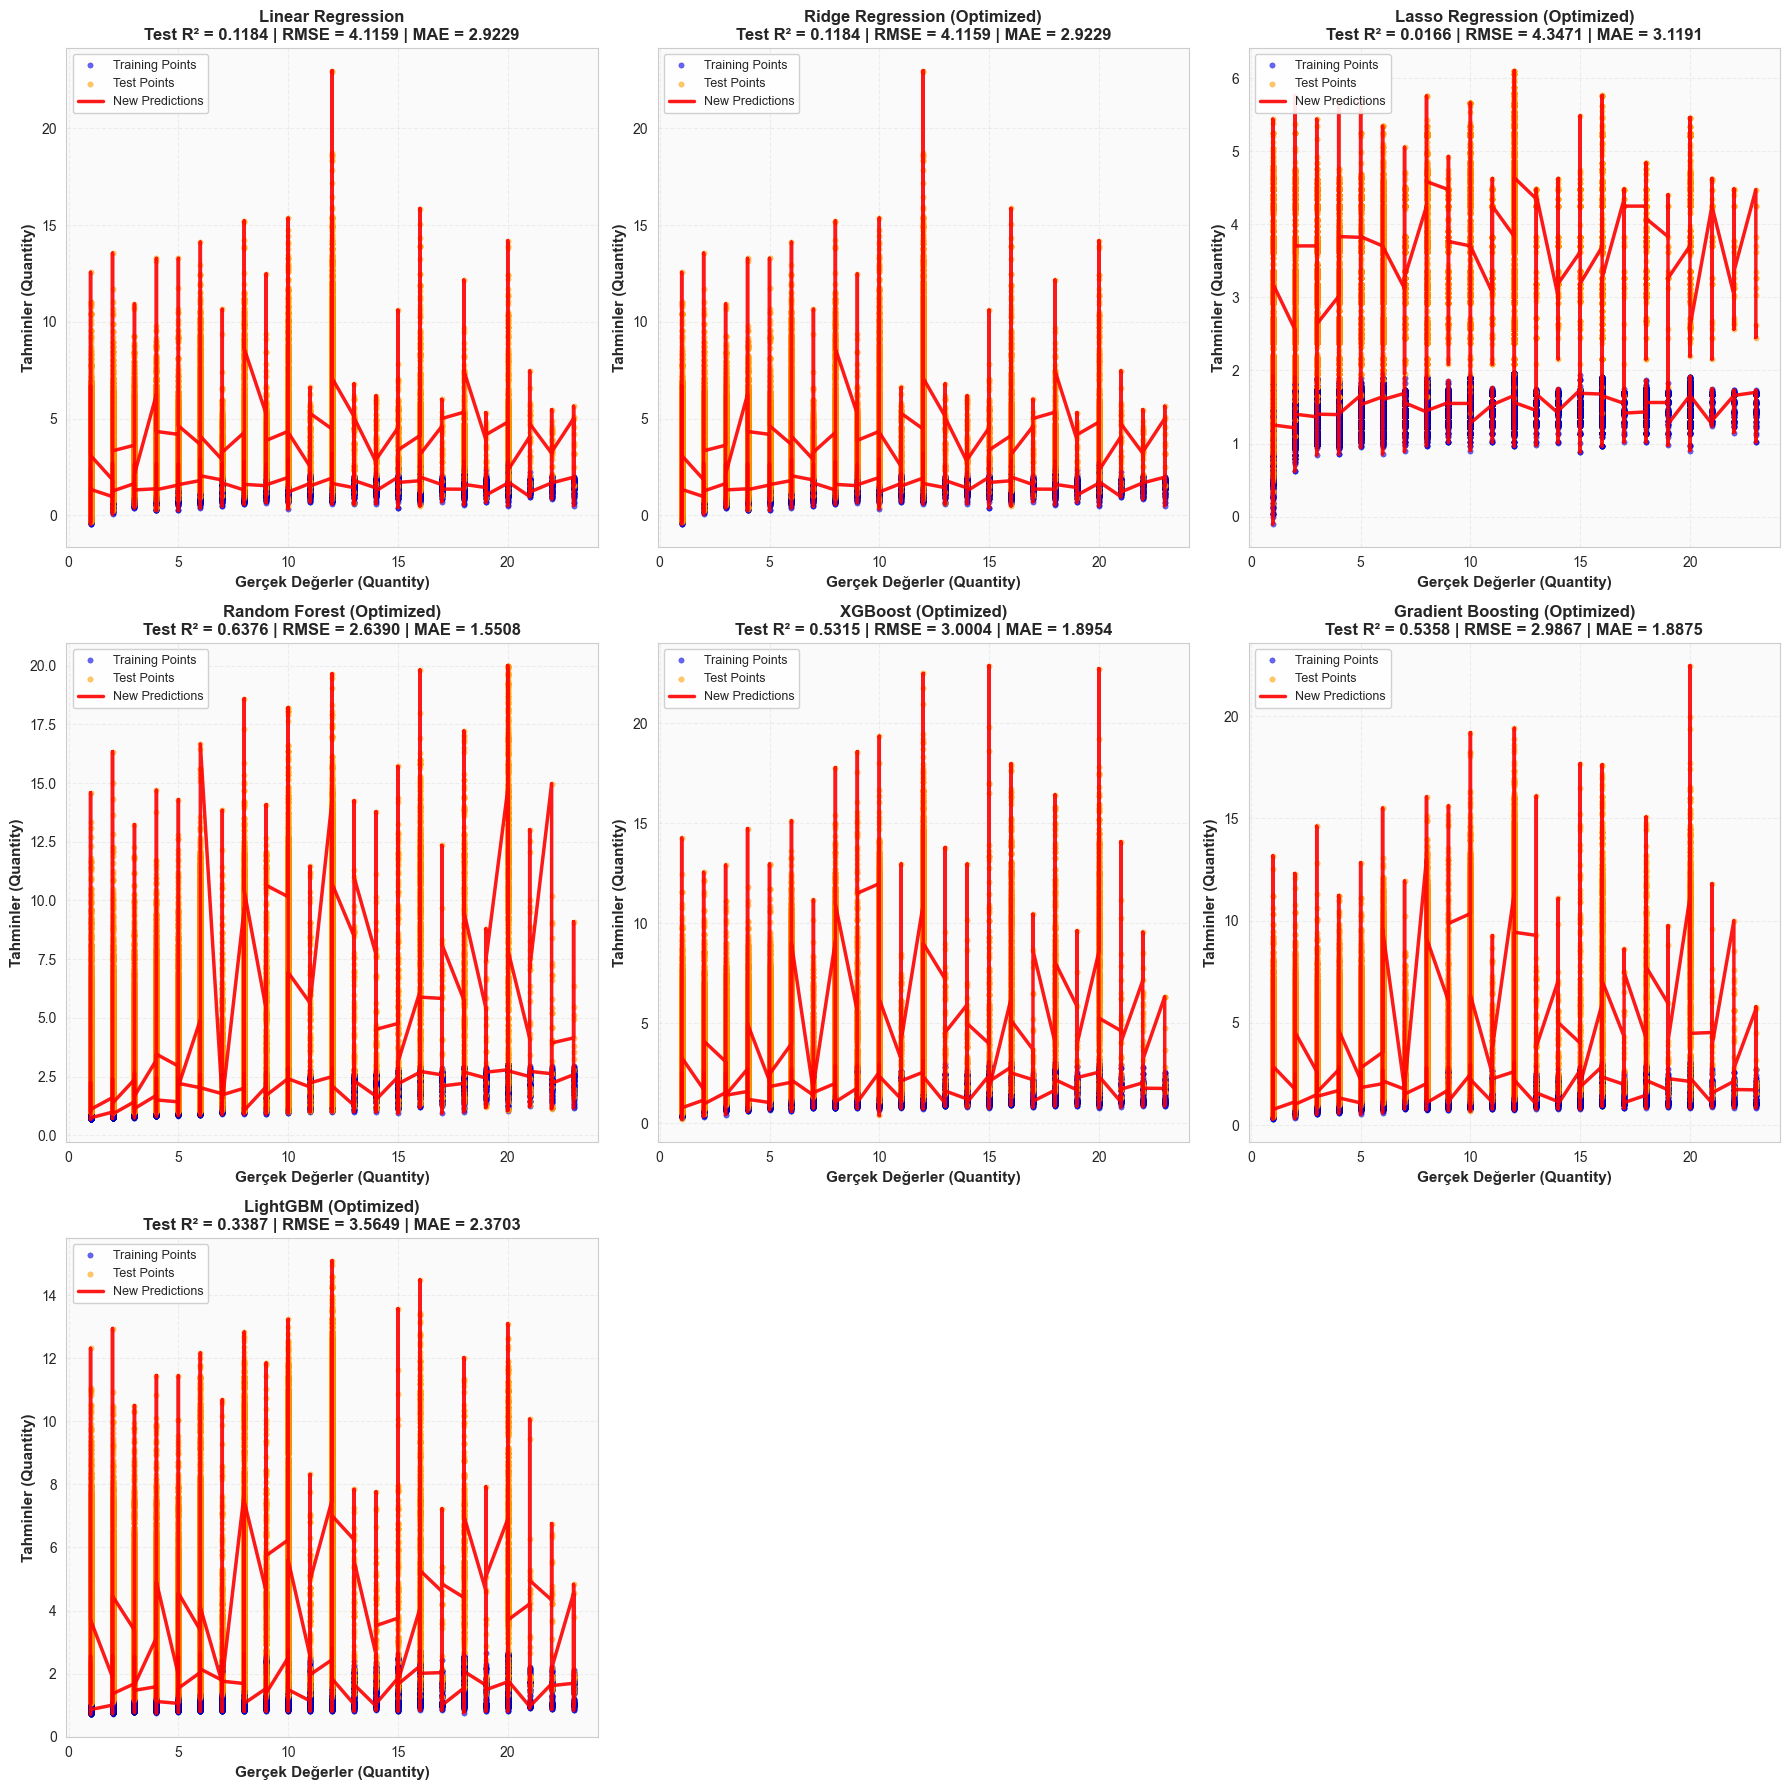


✅ 7 model için görselleştirme tamamlandı
📊 Train örneği sayısı: 365,269
📊 Test örneği sayısı: 91,318


In [31]:
# Train ve Test verileri üzerinde model performans görselleştirmesi
print("=" * 80)
print("📊 TRAIN VE TEST VERİLERİ ÜZERİNDE MODEL PERFORMANS GÖRSELLEŞTİRMESİ")
print("=" * 80)

# Train ve test verilerini hazırla
if 'y_test_original' in globals() and 'y_train_original' in globals():
    y_test_actual = y_test_original.values
    y_train_actual = y_train_original.values
else:
    y_test_actual = y_test.values
    y_train_actual = y_train.values

# Tüm modeller için görselleştirme
if 'predictions_dict' in globals() and len(predictions_dict) > 0:
    # Model sayısına göre subplot boyutunu belirle
    n_models = len(predictions_dict)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    axes = axes.flatten() if n_models > 1 else [axes]
    
    # Her model için görselleştirme
    for idx, (model_name, y_pred_test) in enumerate(predictions_dict.items()):
        ax = axes[idx]
        
        # Train verileri için tahmin yap (modeli results_list'ten bul)
        train_pred = None
        if 'results_list' in globals():
            for result in results_list:
                if result['Model'] == model_name:
                    model = result.get('model')
                    if model is not None:
                        # Model tipine göre tahmin yap
                        if model_name in ['Linear Regression', 'Ridge Regression (Optimized)', 'Lasso Regression (Optimized)']:
                            if 'X_train_scaled' in globals():
                                train_pred = model.predict(X_train_scaled)
                            else:
                                train_pred = model.predict(X_train)
                        else:
                            train_pred = model.predict(X_train)
                        break
        
        # Training Points (mavi daireler)
        ax.scatter(y_train_actual, train_pred if train_pred is not None else y_train_actual, 
                  alpha=0.6, s=15, color='blue', label='Training Points', edgecolors='darkblue', linewidth=0.3)
        
        # Test Points (turuncu daireler)
        ax.scatter(y_test_actual, y_pred_test, 
                  alpha=0.6, s=15, color='orange', label='Test Points', edgecolors='darkorange', linewidth=0.3)
        
        # New Predictions (kırmızı çizgi) - Test verileri için sıralı
        sorted_indices_test = np.argsort(y_test_actual)
        ax.plot(y_test_actual[sorted_indices_test], y_pred_test[sorted_indices_test], 
                'r-', linewidth=2.5, alpha=0.9, label='New Predictions', zorder=5)
        
        # Train verileri için de çizgi (eğer varsa)
        if train_pred is not None:
            sorted_indices_train = np.argsort(y_train_actual)
            ax.plot(y_train_actual[sorted_indices_train], train_pred[sorted_indices_train], 
                    'r-', linewidth=2.5, alpha=0.9, zorder=5)
        
        # R² skorunu hesapla ve göster
        from sklearn.metrics import r2_score
        r2_test = r2_score(y_test_actual, y_pred_test)
        rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))
        mae_test = mean_absolute_error(y_test_actual, y_pred_test)
        
        # Grafik ayarları
        ax.set_xlabel('Gerçek Değerler (Quantity)', fontsize=11, fontweight='bold')
        ax.set_ylabel('Tahminler (Quantity)', fontsize=11, fontweight='bold')
        ax.set_title(f'{model_name}\nTest R² = {r2_test:.4f} | RMSE = {rmse_test:.4f} | MAE = {mae_test:.4f}', 
                     fontsize=12, fontweight='bold')
        ax.legend(loc='upper left', fontsize=9, framealpha=0.9)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_facecolor('#fafafa')
    
    # Boş subplot'ları gizle
    for idx in range(n_models, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ {n_models} model için görselleştirme tamamlandı")
    print(f"📊 Train örneği sayısı: {len(y_train_actual):,}")
    print(f"📊 Test örneği sayısı: {len(y_test_actual):,}")
    
else:
    print("⚠️ predictions_dict bulunamadı. Lütfen önce modelleri eğitin.")


📈 EN İYİ MODELLERİN DETAYLI KARŞILAŞTIRMASI


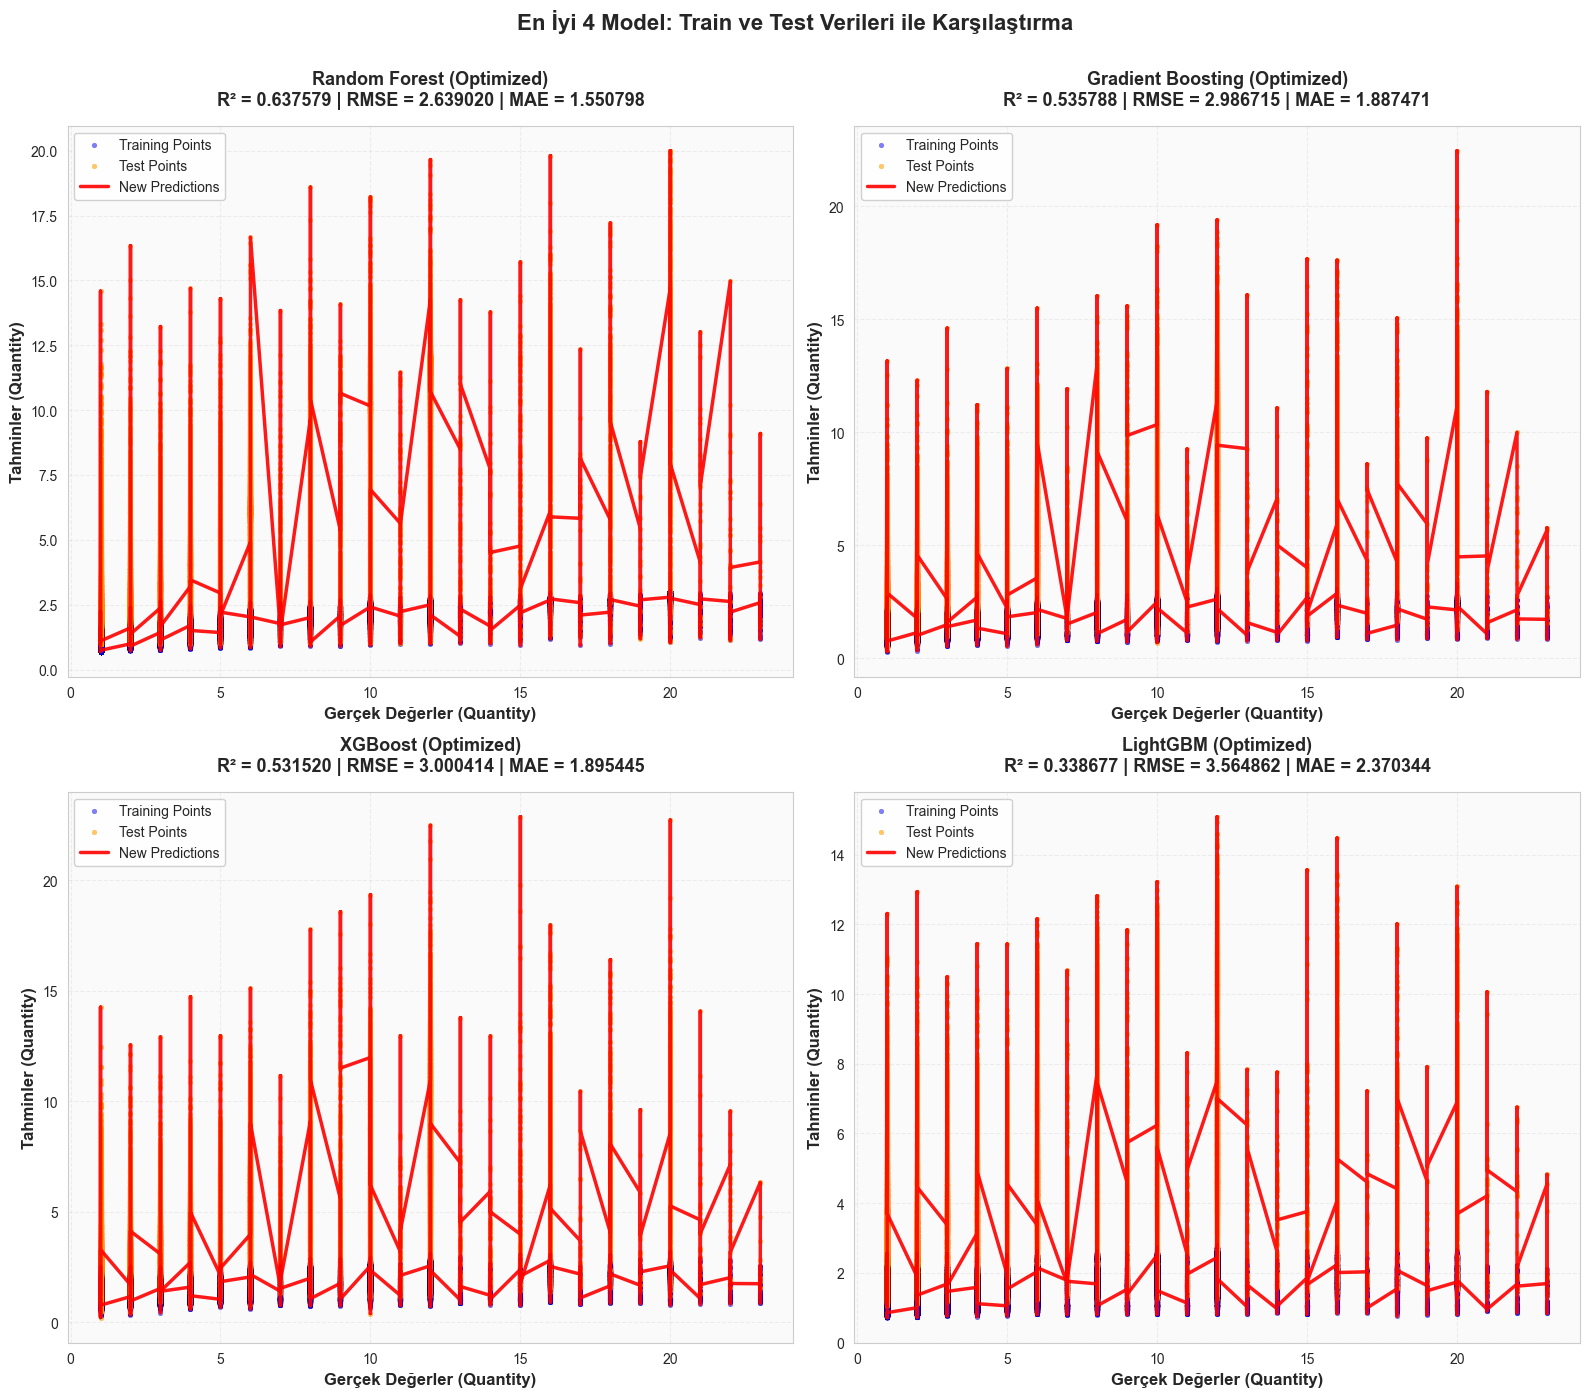


✅ En iyi 4 model için detaylı görselleştirme tamamlandı

📊 Model Sıralaması (R² skoruna göre):
  1. Random Forest (Optimized): R² = 0.637579
  2. Gradient Boosting (Optimized): R² = 0.535788
  3. XGBoost (Optimized): R² = 0.531520
  4. LightGBM (Optimized): R² = 0.338677


In [32]:
# En iyi modelleri detaylı karşılaştırma (Train ve Test ile)
print("=" * 80)
print("📈 EN İYİ MODELLERİN DETAYLI KARŞILAŞTIRMASI")
print("=" * 80)

if 'predictions_dict' in globals() and len(predictions_dict) > 0:
    # En iyi modelleri seç (R² skoruna göre)
    model_scores = {}
    for model_name, y_pred in predictions_dict.items():
        r2 = r2_score(y_test_actual, y_pred)
        model_scores[model_name] = r2
    
    # En iyi 4 modeli seç
    best_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)[:4]
    best_model_names = [name for name, _ in best_models]
    
    # 2x2 subplot oluştur
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    
    for idx, model_name in enumerate(best_model_names):
        ax = axes[idx]
        y_pred_test = predictions_dict[model_name]
        
        # Train verileri için tahmin yap
        train_pred = None
        if 'results_list' in globals():
            for result in results_list:
                if result['Model'] == model_name:
                    model = result.get('model')
                    if model is not None:
                        if model_name in ['Linear Regression', 'Ridge Regression (Optimized)', 'Lasso Regression (Optimized)']:
                            if 'X_train_scaled' in globals():
                                train_pred = model.predict(X_train_scaled)
                            else:
                                train_pred = model.predict(X_train)
                        else:
                            train_pred = model.predict(X_train)
                        break
        
        # Training Points (mavi)
        ax.scatter(y_train_actual, train_pred if train_pred is not None else y_train_actual, 
                  alpha=0.5, s=12, color='blue', label='Training Points', edgecolors='darkblue', linewidth=0.2)
        
        # Test Points (turuncu)
        ax.scatter(y_test_actual, y_pred_test, 
                  alpha=0.6, s=12, color='orange', label='Test Points', edgecolors='darkorange', linewidth=0.2)
        
        # New Predictions (kırmızı çizgi) - Test için
        sorted_indices_test = np.argsort(y_test_actual)
        ax.plot(y_test_actual[sorted_indices_test], y_pred_test[sorted_indices_test], 
                'r-', linewidth=2.5, alpha=0.9, label='New Predictions', zorder=5)
        
        # Train için de çizgi (eğer varsa)
        if train_pred is not None:
            sorted_indices_train = np.argsort(y_train_actual)
            ax.plot(y_train_actual[sorted_indices_train], train_pred[sorted_indices_train], 
                    'r-', linewidth=2.5, alpha=0.9, zorder=5)
        
        # Metrikleri hesapla
        r2 = r2_score(y_test_actual, y_pred_test)
        rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))
        mae = mean_absolute_error(y_test_actual, y_pred_test)
        
        # Grafik ayarları
        ax.set_xlabel('Gerçek Değerler (Quantity)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Tahminler (Quantity)', fontsize=12, fontweight='bold')
        ax.set_title(f'{model_name}\nR² = {r2:.6f} | RMSE = {rmse:.6f} | MAE = {mae:.6f}', 
                     fontsize=13, fontweight='bold', pad=15)
        ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_facecolor('#fafafa')
    
    plt.suptitle('En İyi 4 Model: Train ve Test Verileri ile Karşılaştırma', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.show()
    
    print(f"\n✅ En iyi {len(best_model_names)} model için detaylı görselleştirme tamamlandı")
    print(f"\n📊 Model Sıralaması (R² skoruna göre):")
    for i, (name, score) in enumerate(best_models, 1):
        print(f"  {i}. {name}: R² = {score:.6f}")
        
else:
    print("⚠️ predictions_dict bulunamadı. Lütfen önce modelleri eğitin.")


## 📝 12. Özet ve Sonuçlar

### Analiz Özeti
- **Veri Seti**: Online Retail II (E-ticaret işlem kayıtları)
- **Hedef Değişken**: Quantity (Satış Miktarı)
- **Problem Tipi**: Regresyon
- **Kullanılan Özellikler**: Price, Country, invoice_year, invoice_month, invoice_dow, invoice_hour, is_weekend

### Model Performansları
Yukarıdaki karşılaştırma tablosunda tüm modellerin performans metrikleri görülebilir.

### En İyi Model
Yukarıdaki model karşılaştırma sonuçlarına göre en yüksek Test R² skoruna sahip model en iyi performansı göstermiştir.

### Sonraki Adımlar
1. Hiperparametre optimizasyonu (GridSearchCV veya RandomizedSearchCV)
2. Daha fazla özellik mühendisliği
3. Ensemble yöntemleri
4. Model interpretasyonu (SHAP değerleri)
5. Production için API geliştirme


## ⚠️ 14. Overfitting Analizi ve Çözüm Önerileri

Model performanslarına bakıldığında, özellikle ensemble modellerde (Random Forest, Gradient Boosting, XGBoost) overfitting belirtileri görülmektedir. Bu bölümde overfitting analizi ve çözüm önerileri sunulmaktadır.


⚠️ OVERFITTING ANALİZİ

📊 Train vs Test Performans Karşılaştırması:
                        Model  Train_R²  Test_R²  R²_Farkı  Train_RMSE  Test_RMSE  RMSE_Oranı                Durum
            Linear Regression  0.023904 0.118432 -0.094528    4.310508   4.115889    0.954850    ✅ Overfitting Yok
 Ridge Regression (Optimized)  0.023914 0.118431 -0.094517    4.310488   4.115893    0.954855    ✅ Overfitting Yok
 Lasso Regression (Optimized)  0.016761 0.016585  0.000176    4.326252   4.347145    1.004829    ✅ Overfitting Yok
    Random Forest (Optimized)  0.852086 0.637579  0.214508    1.677980   2.639020    1.572736 🔴 Yüksek Overfitting
          XGBoost (Optimized)  0.561224 0.531520  0.029704    2.890039   3.000414    1.038191    ✅ Overfitting Yok
Gradient Boosting (Optimized)  0.565354 0.535788  0.029566    2.876405   2.986715    1.038350    ✅ Overfitting Yok
         LightGBM (Optimized)  0.344984 0.338677  0.006308    3.531086   3.564862    1.009565    ✅ Overfitting Yok


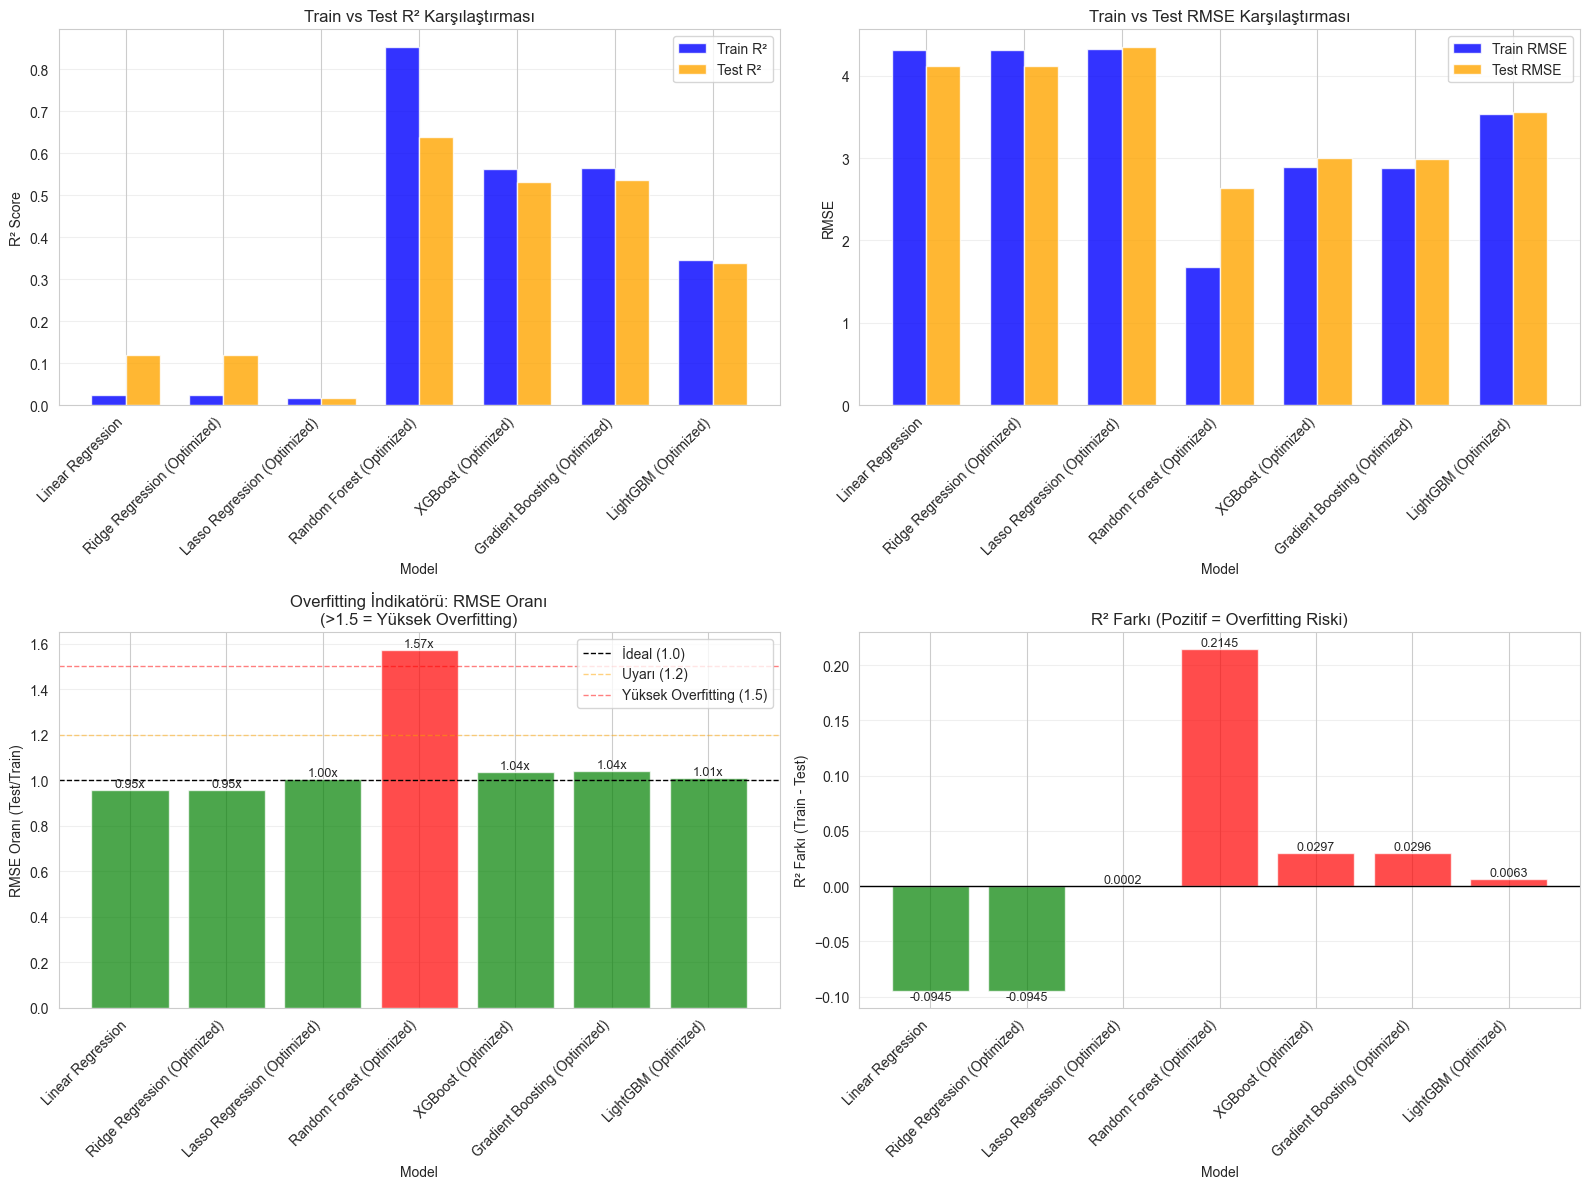


📋 OVERFITTING ÖZETİ

🔴 YÜKSEK OVERFITTING (>1.5x):
  - Random Forest (Optimized): RMSE Oranı = 1.57x

✅ OVERFITTING YOK (<1.1x):
  - Linear Regression: RMSE Oranı = 0.95x
  - Ridge Regression (Optimized): RMSE Oranı = 0.95x
  - Lasso Regression (Optimized): RMSE Oranı = 1.00x
  - XGBoost (Optimized): RMSE Oranı = 1.04x
  - Gradient Boosting (Optimized): RMSE Oranı = 1.04x
  - LightGBM (Optimized): RMSE Oranı = 1.01x

✅ Overfitting analizi kaydedildi: c:\Users\akif\Desktop\code\machine-learning-project\uni-homework\regression-2\overfitting_analysis.csv


In [33]:
# Overfitting Analizi
print("=" * 80)
print("⚠️ OVERFITTING ANALİZİ")
print("=" * 80)

if 'results_df' in globals() or ('results_list' in globals() and len(results_list) > 0):
    # results_df yoksa oluştur
    if 'results_df' not in globals():
        results_df = pd.DataFrame(results_list)
        results_df = results_df.drop('model', axis=1)
    
    # Overfitting analizi için DataFrame oluştur
    overfitting_analysis = []
    
    for idx, row in results_df.iterrows():
        model_name = row['Model']
        train_r2 = row['Train_R2']
        test_r2 = row['Test_R2']
        train_rmse = row['Train_RMSE']
        test_rmse = row['Test_RMSE']
        
        # Overfitting metrikleri
        r2_diff = train_r2 - test_r2
        rmse_ratio = test_rmse / train_rmse if train_rmse > 0 else 0
        rmse_diff = test_rmse - train_rmse
        
        # Overfitting durumu
        if rmse_ratio > 1.5:
            status = "🔴 Yüksek Overfitting"
        elif rmse_ratio > 1.2:
            status = "🟡 Orta Overfitting"
        elif rmse_ratio > 1.1:
            status = "🟢 Hafif Overfitting"
        else:
            status = "✅ Overfitting Yok"
        
        overfitting_analysis.append({
            'Model': model_name,
            'Train_R²': train_r2,
            'Test_R²': test_r2,
            'R²_Farkı': r2_diff,
            'Train_RMSE': train_rmse,
            'Test_RMSE': test_rmse,
            'RMSE_Oranı': rmse_ratio,
            'RMSE_Farkı': rmse_diff,
            'Durum': status
        })
    
    overfitting_df = pd.DataFrame(overfitting_analysis)
    
    print("\n📊 Train vs Test Performans Karşılaştırması:")
    print(overfitting_df[['Model', 'Train_R²', 'Test_R²', 'R²_Farkı', 
                          'Train_RMSE', 'Test_RMSE', 'RMSE_Oranı', 'Durum']].to_string(index=False))
    
    # Görselleştirme
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Train vs Test R² Karşılaştırması
    ax1 = axes[0, 0]
    x = np.arange(len(overfitting_df))
    width = 0.35
    ax1.bar(x - width/2, overfitting_df['Train_R²'], width, label='Train R²', alpha=0.8, color='blue')
    ax1.bar(x + width/2, overfitting_df['Test_R²'], width, label='Test R²', alpha=0.8, color='orange')
    ax1.set_xlabel('Model')
    ax1.set_ylabel('R² Score')
    ax1.set_title('Train vs Test R² Karşılaştırması')
    ax1.set_xticks(x)
    ax1.set_xticklabels(overfitting_df['Model'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 2. Train vs Test RMSE Karşılaştırması
    ax2 = axes[0, 1]
    ax2.bar(x - width/2, overfitting_df['Train_RMSE'], width, label='Train RMSE', alpha=0.8, color='blue')
    ax2.bar(x + width/2, overfitting_df['Test_RMSE'], width, label='Test RMSE', alpha=0.8, color='orange')
    ax2.set_xlabel('Model')
    ax2.set_ylabel('RMSE')
    ax2.set_title('Train vs Test RMSE Karşılaştırması')
    ax2.set_xticks(x)
    ax2.set_xticklabels(overfitting_df['Model'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. RMSE Oranı (Test/Train)
    ax3 = axes[1, 0]
    colors = ['red' if ratio > 1.5 else 'orange' if ratio > 1.2 else 'yellow' if ratio > 1.1 else 'green' 
              for ratio in overfitting_df['RMSE_Oranı']]
    bars = ax3.bar(overfitting_df['Model'], overfitting_df['RMSE_Oranı'], color=colors, alpha=0.7)
    ax3.axhline(y=1.0, color='black', linestyle='--', linewidth=1, label='İdeal (1.0)')
    ax3.axhline(y=1.2, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='Uyarı (1.2)')
    ax3.axhline(y=1.5, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Yüksek Overfitting (1.5)')
    ax3.set_xlabel('Model')
    ax3.set_ylabel('RMSE Oranı (Test/Train)')
    ax3.set_title('Overfitting İndikatörü: RMSE Oranı\n(>1.5 = Yüksek Overfitting)')
    ax3.set_xticklabels(overfitting_df['Model'], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Değerleri çubukların üzerine yaz
    for bar, ratio in zip(bars, overfitting_df['RMSE_Oranı']):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{ratio:.2f}x', ha='center', va='bottom', fontsize=9)
    
    # 4. R² Farkı
    ax4 = axes[1, 1]
    colors_r2 = ['red' if diff > 0.001 else 'orange' if diff > 0.0005 else 'green' 
                 for diff in overfitting_df['R²_Farkı']]
    bars2 = ax4.bar(overfitting_df['Model'], overfitting_df['R²_Farkı'], color=colors_r2, alpha=0.7)
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.set_xlabel('Model')
    ax4.set_ylabel('R² Farkı (Train - Test)')
    ax4.set_title('R² Farkı (Pozitif = Overfitting Riski)')
    ax4.set_xticklabels(overfitting_df['Model'], rotation=45, ha='right')
    ax4.grid(True, alpha=0.3, axis='y')
    
    # Değerleri çubukların üzerine yaz
    for bar, diff in zip(bars2, overfitting_df['R²_Farkı']):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{diff:.4f}', ha='center', va='bottom' if diff >= 0 else 'top', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Özet
    print("\n" + "=" * 80)
    print("📋 OVERFITTING ÖZETİ")
    print("=" * 80)
    
    high_overfitting = overfitting_df[overfitting_df['RMSE_Oranı'] > 1.5]
    medium_overfitting = overfitting_df[(overfitting_df['RMSE_Oranı'] > 1.2) & (overfitting_df['RMSE_Oranı'] <= 1.5)]
    low_overfitting = overfitting_df[(overfitting_df['RMSE_Oranı'] > 1.1) & (overfitting_df['RMSE_Oranı'] <= 1.2)]
    no_overfitting = overfitting_df[overfitting_df['RMSE_Oranı'] <= 1.1]
    
    if len(high_overfitting) > 0:
        print("\n🔴 YÜKSEK OVERFITTING (>1.5x):")
        for _, row in high_overfitting.iterrows():
            print(f"  - {row['Model']}: RMSE Oranı = {row['RMSE_Oranı']:.2f}x")
    
    if len(medium_overfitting) > 0:
        print("\n🟡 ORTA OVERFITTING (1.2-1.5x):")
        for _, row in medium_overfitting.iterrows():
            print(f"  - {row['Model']}: RMSE Oranı = {row['RMSE_Oranı']:.2f}x")
    
    if len(low_overfitting) > 0:
        print("\n🟢 HAFİF OVERFITTING (1.1-1.2x):")
        for _, row in low_overfitting.iterrows():
            print(f"  - {row['Model']}: RMSE Oranı = {row['RMSE_Oranı']:.2f}x")
    
    if len(no_overfitting) > 0:
        print("\n✅ OVERFITTING YOK (<1.1x):")
        for _, row in no_overfitting.iterrows():
            print(f"  - {row['Model']}: RMSE Oranı = {row['RMSE_Oranı']:.2f}x")
    
    # Sonuçları kaydet
    overfitting_df.to_csv(BASE_DIR / 'overfitting_analysis.csv', index=False)
    print(f"\n✅ Overfitting analizi kaydedildi: {BASE_DIR / 'overfitting_analysis.csv'}")
    
else:
    print("⚠️ results_df veya results_list bulunamadı. Lütfen önce modelleri eğitin.")


### 💡 Overfitting Çözüm Önerileri

Aşağıdaki öneriler overfitting'i azaltmak için uygulanabilir:

1. **Model Kompleksliğini Azaltma**: `max_depth`, `n_estimators` değerlerini düşürün
2. **Regularization Artırma**: `min_samples_split`, `min_samples_leaf` değerlerini artırın
3. **Daha Fazla Veri**: %3 yerine %10-20 veri kullanın
4. **Early Stopping**: XGBoost ve LightGBM için early stopping kullanın
5. **Özellik Seçimi**: En önemli özellikleri seçin
6. **Cross-Validation**: Daha fazla CV fold kullanın


## 📊 15. Gerçek Değerler vs Tahminler Görselleştirmesi

Gerçek değerler (X ekseni) vs Tahminler (Y ekseni) scatter plot görselleştirmesi:
- **Training Points**: Mavi noktalar (train verileri üzerindeki tahminler)
- **Test Points**: Turuncu noktalar (test verileri üzerindeki tahminler)


📊 POLYNOMIAL REGRESSION STİLİ GÖRSELLEŞTİRME


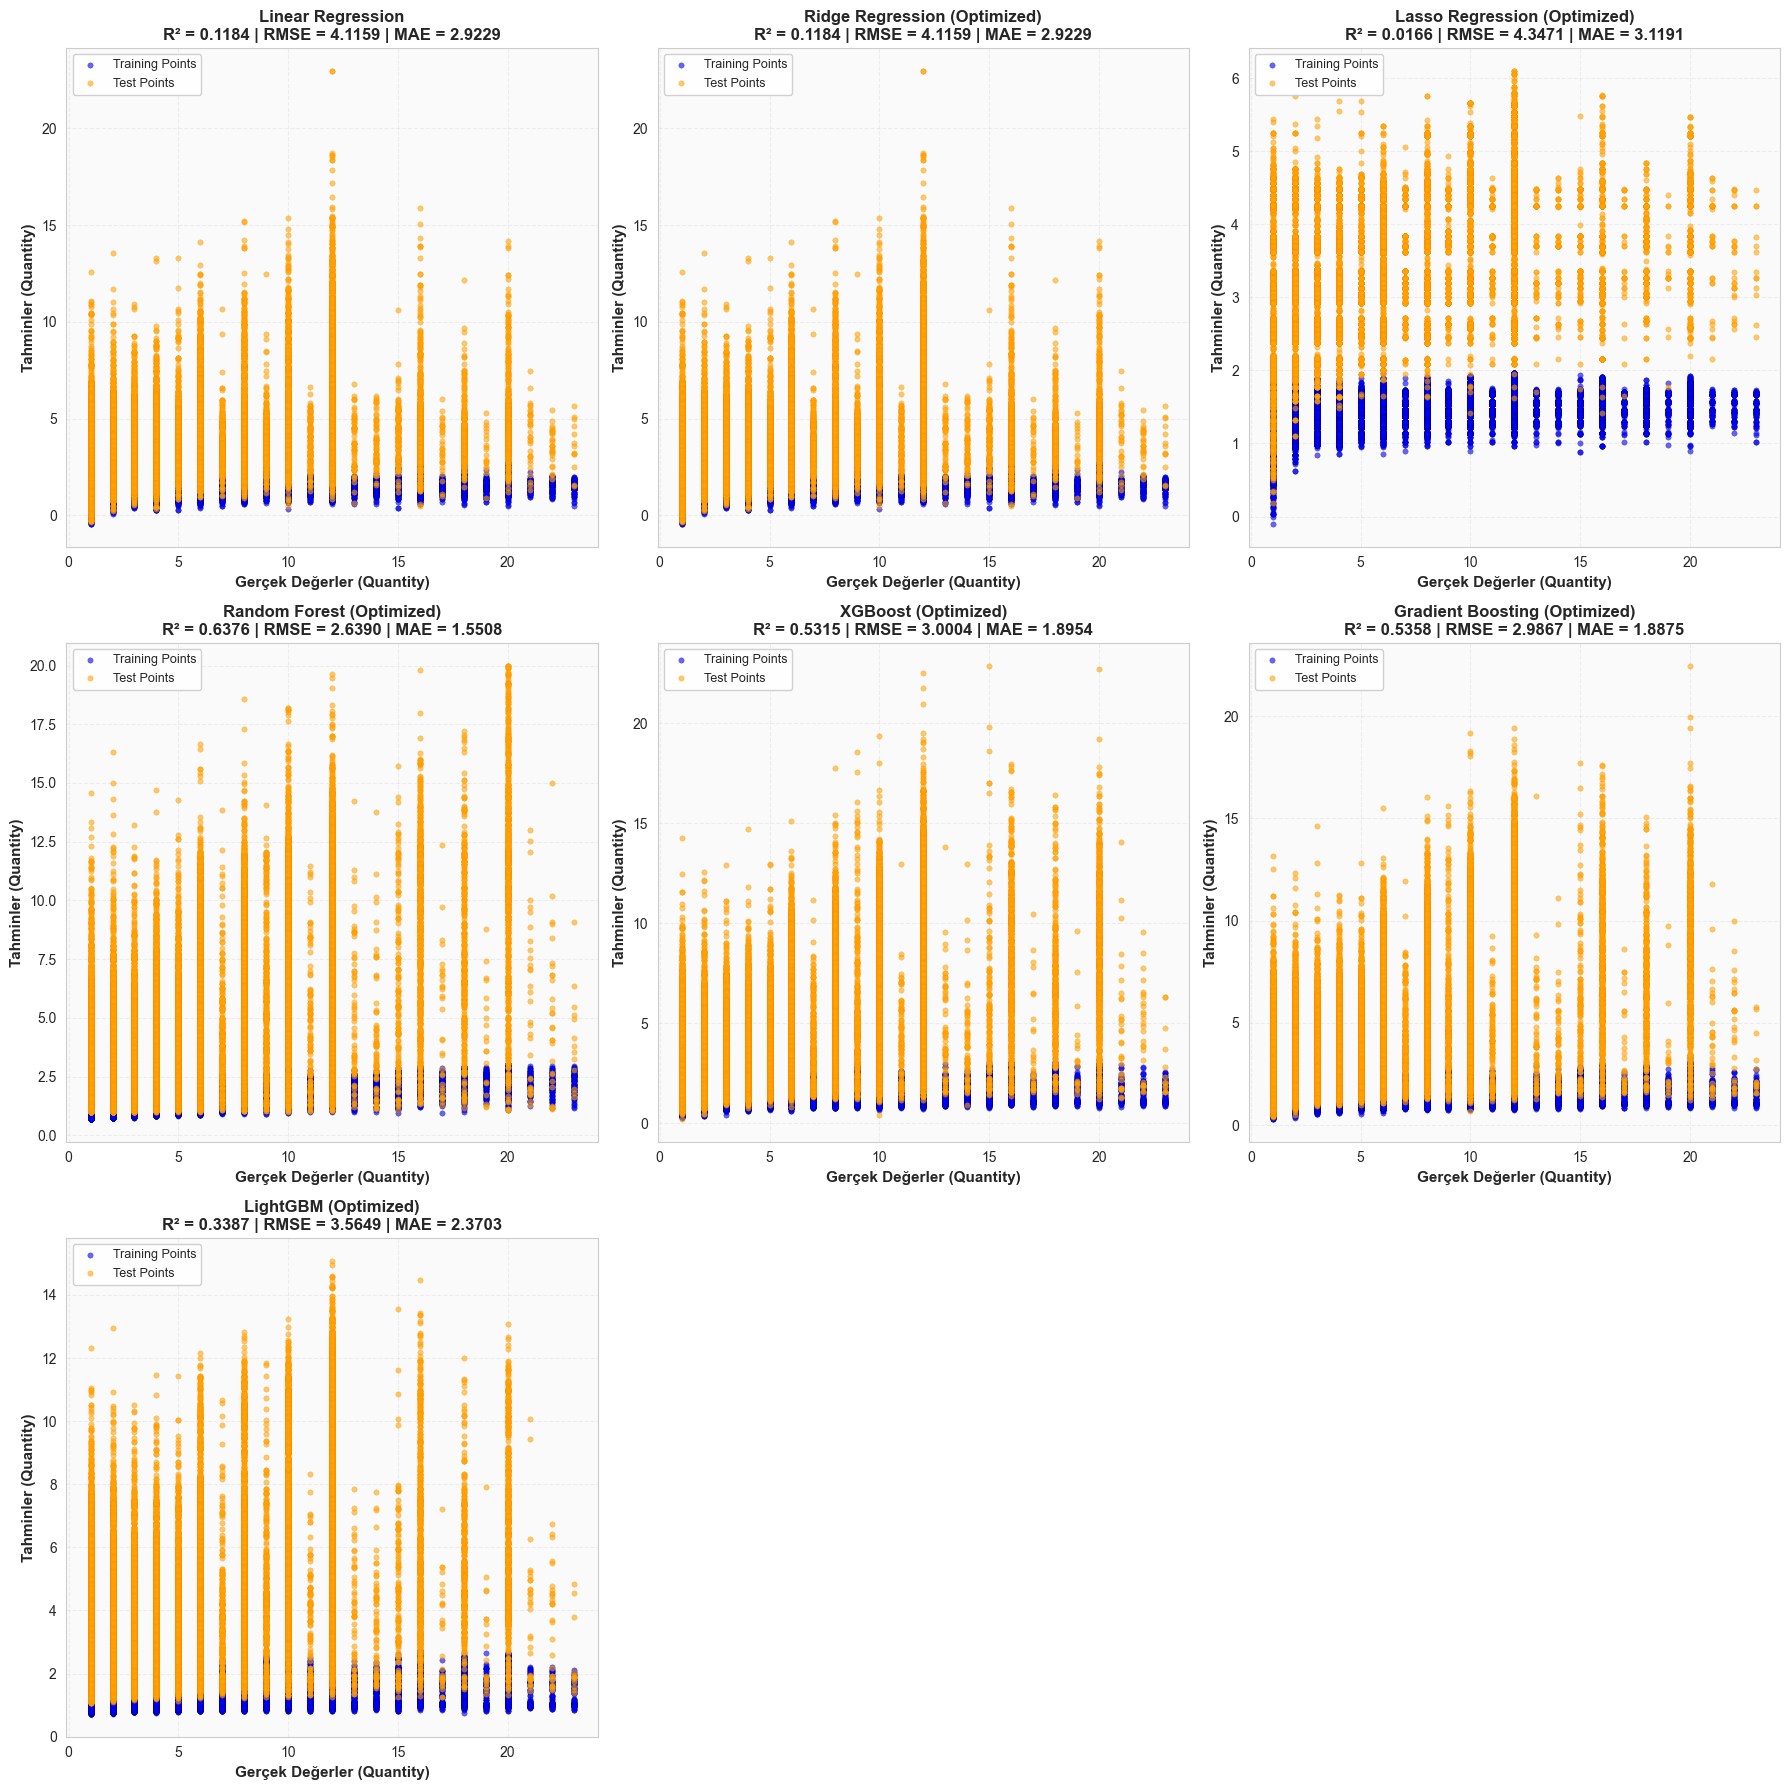


✅ 7 model için gerçek değerler vs tahminler görselleştirmesi tamamlandı
📊 Train örneği sayısı: 365,269
📊 Test örneği sayısı: 91,318


In [34]:
# Polynomial Regression stili görselleştirme
print("=" * 80)
print("📊 POLYNOMIAL REGRESSION STİLİ GÖRSELLEŞTİRME")
print("=" * 80)

# Train ve test verilerini hazırla
if 'y_test_original' in globals() and 'y_train_original' in globals():
    y_test_actual = y_test_original.values
    y_train_actual = y_train_original.values
else:
    y_test_actual = y_test.values
    y_train_actual = y_train.values

# Tüm modeller için görselleştirme
if 'predictions_dict' in globals() and len(predictions_dict) > 0:
    # Model sayısına göre subplot boyutunu belirle
    n_models = len(predictions_dict)
    n_cols = 3
    n_rows = (n_models + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
    axes = axes.flatten() if n_models > 1 else [axes]
    
    # Her model için görselleştirme
    for idx, (model_name, y_pred_test) in enumerate(predictions_dict.items()):
        ax = axes[idx]
        
        # Train verileri için tahmin yap
        train_pred = None
        if 'results_list' in globals():
            for result in results_list:
                if result['Model'] == model_name:
                    model = result.get('model')
                    if model is not None:
                        if model_name in ['Linear Regression', 'Ridge Regression (Optimized)', 'Lasso Regression (Optimized)']:
                            if 'X_train_scaled' in globals():
                                train_pred = model.predict(X_train_scaled)
                            else:
                                train_pred = model.predict(X_train)
                        else:
                            train_pred = model.predict(X_train)
                        break
        
        # Training Points - Gerçek değerler vs Tahminler (mavi scatter)
        ax.scatter(y_train_actual, train_pred if train_pred is not None else y_train_actual, 
                  color='blue', s=15, alpha=0.6, label="Training Points", edgecolors='darkblue', linewidth=0.3)
        
        # Test Points - Gerçek değerler vs Tahminler (turuncu scatter)
        ax.scatter(y_test_actual, y_pred_test, 
                  color='orange', s=15, alpha=0.6, label="Test Points", edgecolors='darkorange', linewidth=0.3)
        
        # R² skorunu hesapla ve göster
        from sklearn.metrics import r2_score
        r2_test = r2_score(y_test_actual, y_pred_test)
        rmse_test = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))
        mae_test = mean_absolute_error(y_test_actual, y_pred_test)
        
        # Grafik ayarları
        ax.set_xlabel('Gerçek Değerler (Quantity)', fontsize=11, fontweight='bold')
        ax.set_ylabel('Tahminler (Quantity)', fontsize=11, fontweight='bold')
        ax.set_title(f'{model_name}\nR² = {r2_test:.4f} | RMSE = {rmse_test:.4f} | MAE = {mae_test:.4f}', 
                     fontsize=12, fontweight='bold')
        ax.legend(loc='upper left', fontsize=9, framealpha=0.9)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_facecolor('#fafafa')
    
    # Boş subplot'ları gizle
    for idx in range(n_models, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✅ {n_models} model için gerçek değerler vs tahminler görselleştirmesi tamamlandı")
    print(f"📊 Train örneği sayısı: {len(y_train_actual):,}")
    print(f"📊 Test örneği sayısı: {len(y_test_actual):,}")
    
else:
    print("⚠️ predictions_dict bulunamadı. Lütfen önce modelleri eğitin.")


### 📈 En İyi Modeller için Detaylı Görselleştirme

En iyi performans gösteren modellerin gerçek değerler vs tahminler karşılaştırması.


📈 EN İYİ MODELLER: GERÇEK DEĞERLER VS TAHMİNLER


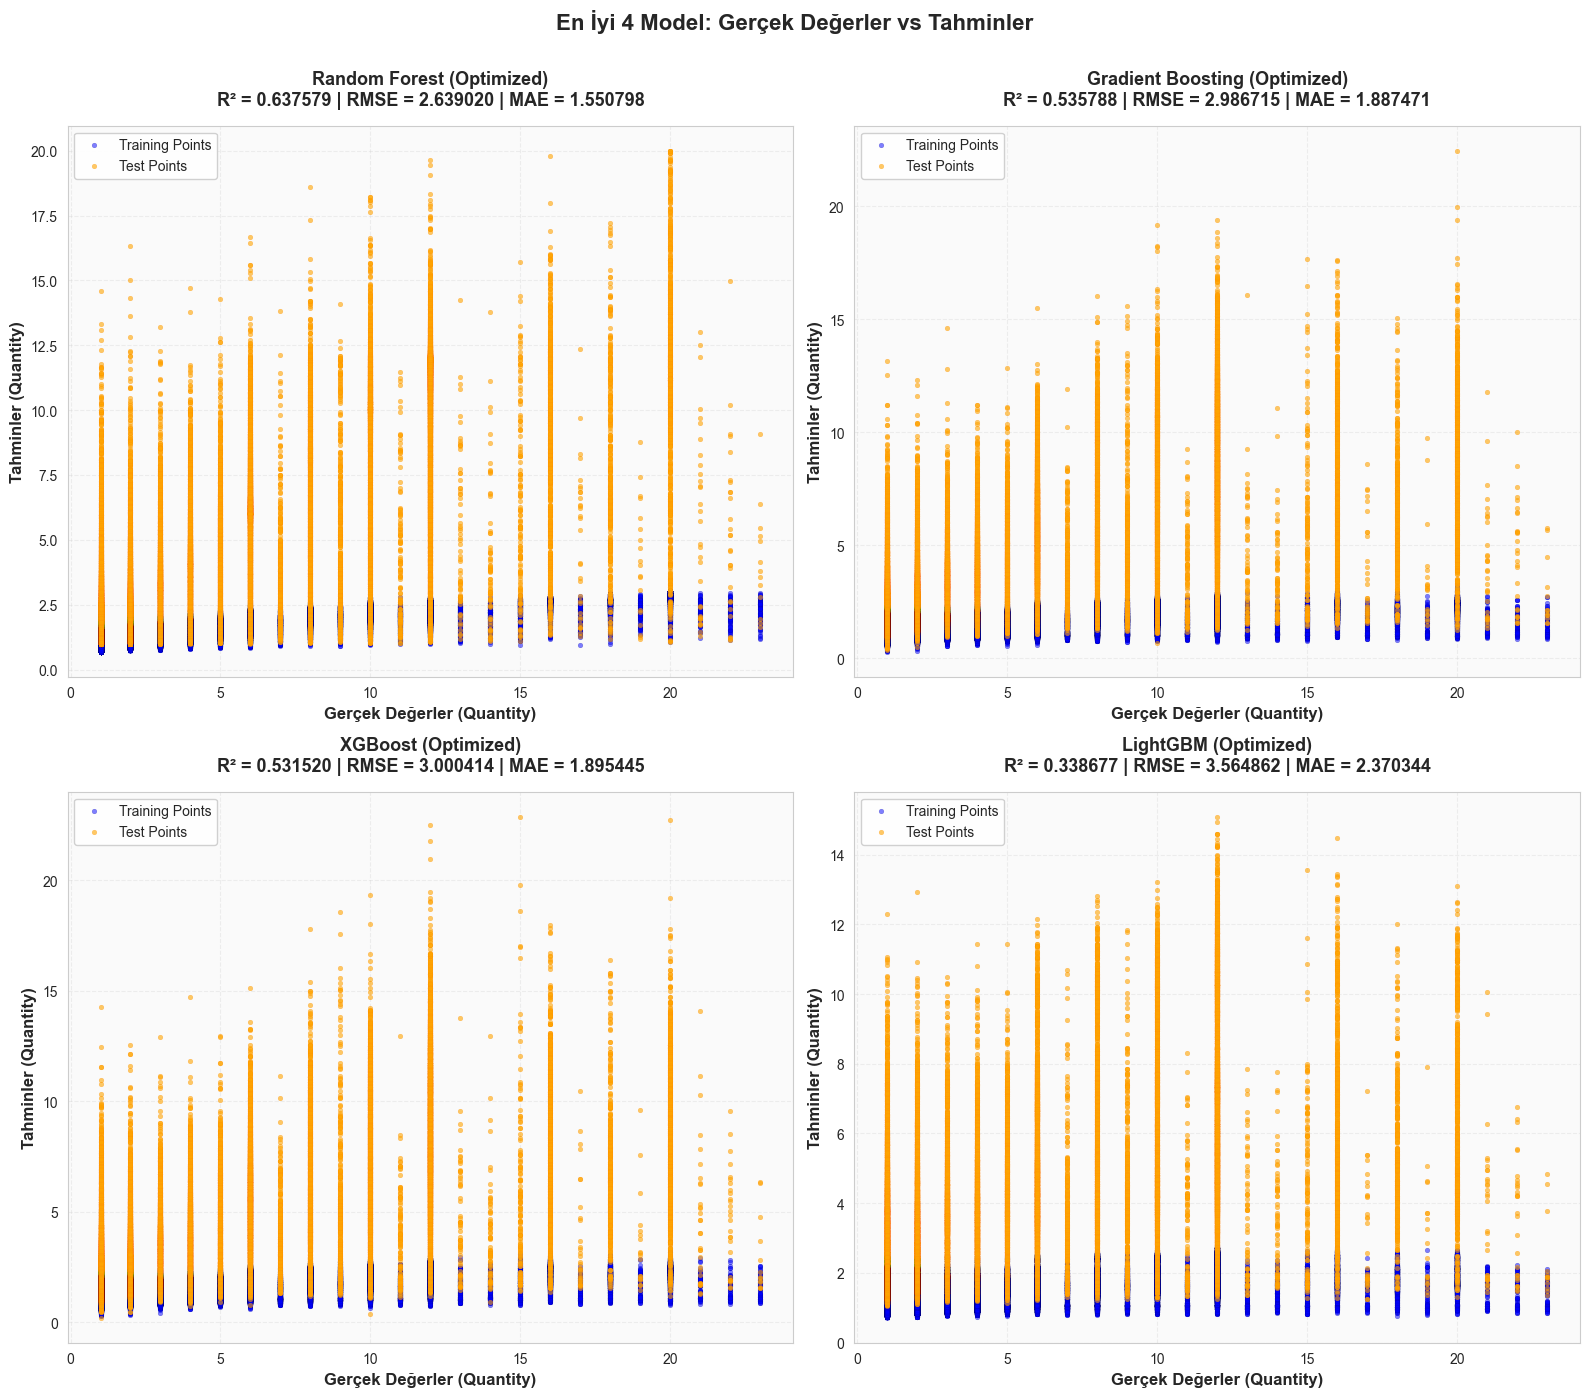


✅ En iyi 4 model için gerçek değerler vs tahminler görselleştirmesi tamamlandı

📊 Model Sıralaması (R² skoruna göre):
  1. Random Forest (Optimized): R² = 0.637579
  2. Gradient Boosting (Optimized): R² = 0.535788
  3. XGBoost (Optimized): R² = 0.531520
  4. LightGBM (Optimized): R² = 0.338677


In [35]:
# En iyi modeller için detaylı görselleştirme
print("=" * 80)
print("📈 EN İYİ MODELLER: GERÇEK DEĞERLER VS TAHMİNLER")
print("=" * 80)

if 'predictions_dict' in globals() and len(predictions_dict) > 0:
    # En iyi modelleri seç (R² skoruna göre)
    model_scores = {}
    for model_name, y_pred in predictions_dict.items():
        r2 = r2_score(y_test_actual, y_pred)
        model_scores[model_name] = r2
    
    # En iyi 4 modeli seç
    best_models = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)[:4]
    best_model_names = [name for name, _ in best_models]
    
    # 2x2 subplot oluştur
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    axes = axes.flatten()
    
    for idx, model_name in enumerate(best_model_names):
        ax = axes[idx]
        y_pred_test = predictions_dict[model_name]
        
        # Train verileri için tahmin yap
        train_pred = None
        if 'results_list' in globals():
            for result in results_list:
                if result['Model'] == model_name:
                    model = result.get('model')
                    if model is not None:
                        if model_name in ['Linear Regression', 'Ridge Regression (Optimized)', 'Lasso Regression (Optimized)']:
                            if 'X_train_scaled' in globals():
                                train_pred = model.predict(X_train_scaled)
                            else:
                                train_pred = model.predict(X_train)
                        else:
                            train_pred = model.predict(X_train)
                        break
        
        # Training Points - Gerçek değerler vs Tahminler (mavi scatter)
        ax.scatter(y_train_actual, train_pred if train_pred is not None else y_train_actual, 
                  color='blue', s=12, alpha=0.5, label="Training Points", edgecolors='darkblue', linewidth=0.2)
        
        # Test Points - Gerçek değerler vs Tahminler (turuncu scatter)
        ax.scatter(y_test_actual, y_pred_test, 
                  color='orange', s=12, alpha=0.6, label="Test Points", edgecolors='darkorange', linewidth=0.2)
        
        # Metrikleri hesapla
        r2 = r2_score(y_test_actual, y_pred_test)
        rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_test))
        mae = mean_absolute_error(y_test_actual, y_pred_test)
        
        # Grafik ayarları
        ax.set_xlabel('Gerçek Değerler (Quantity)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Tahminler (Quantity)', fontsize=12, fontweight='bold')
        ax.set_title(f'{model_name}\nR² = {r2:.6f} | RMSE = {rmse:.6f} | MAE = {mae:.6f}', 
                     fontsize=13, fontweight='bold', pad=15)
        ax.legend(loc='upper left', fontsize=10, framealpha=0.9)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.set_facecolor('#fafafa')
    
    plt.suptitle('En İyi 4 Model: Gerçek Değerler vs Tahminler', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.show()
    
    print(f"\n✅ En iyi {len(best_model_names)} model için gerçek değerler vs tahminler görselleştirmesi tamamlandı")
    print(f"\n📊 Model Sıralaması (R² skoruna göre):")
    for i, (name, score) in enumerate(best_models, 1):
        print(f"  {i}. {name}: R² = {score:.6f}")
        
else:
    print("⚠️ predictions_dict bulunamadı. Lütfen önce modelleri eğitin.")


## 📖 Grafik Okuma Rehberi

Bu bölümde, notebook'ta yer alan grafiklerin nasıl okunacağı ve neyi gösterdiği açıklanmaktadır.

### 📊 1. Gerçek Değerler vs Tahminler Grafikleri (En Son Bölüm)

**Ne Gösterir?**
- Bu grafikler, modellerin gerçek değerleri ne kadar iyi tahmin ettiğini gösterir.

**Nasıl Okunur?**

#### X Ekseni (Yatay Eksen):
- **Gerçek Değerler (Quantity)**: Veri setindeki gerçek satış miktarları
- Örnek: Eğer bir nokta X=5 konumundaysa, gerçek satış miktarı 5 birimdir

#### Y Ekseni (Dikey Eksen):
- **Tahminler (Quantity)**: Modelin tahmin ettiği satış miktarları
- Örnek: Eğer bir nokta Y=5 konumundaysa, model 5 birim tahmin etmiştir

#### Noktaların Renkleri:

🔵 **Mavi Noktalar (Training Points)**:
- Eğitim verileri üzerindeki tahminler
- Model bu verilerle eğitildi
- Mavi noktalar ne kadar y=x çizgisine yakınsa, model eğitim verilerinde o kadar iyi performans gösteriyor

🟠 **Turuncu Noktalar (Test Points)**:
- Test verileri üzerindeki tahminler
- Model bu verileri hiç görmedi (yeni veri)
- Turuncu noktalar ne kadar y=x çizgisine yakınsa, model genelleme yapabiliyor demektir

#### İdeal Durum:
- Tüm noktalar **y=x çizgisi** (diagonal çizgi) üzerinde olmalı
- Bu, tahminlerin gerçek değerlerle tamamen eşleştiği anlamına gelir
- Noktalar çizgiden uzaklaştıkça hata artar

#### Grafikten Çıkarılabilecek Bilgiler:

✅ **İyi Model İşaretleri:**
- Mavi ve turuncu noktalar y=x çizgisine yakın
- Noktalar çizgi etrafında simetrik dağılmış
- Çok fazla aykırı değer (outlier) yok

⚠️ **Sorunlu Model İşaretleri:**
- Noktalar çizgiden çok uzak
- Turuncu noktalar mavi noktalardan daha uzak (overfitting)
- Noktalar belirli bir bölgede toplanmış (underfitting)

### 📊 2. Overfitting Analizi Grafikleri

**Ne Gösterir?**
- Modellerin eğitim verilerinde mi yoksa test verilerinde mi daha iyi performans gösterdiğini analiz eder

**Nasıl Okunur?**

#### Train vs Test R² Karşılaştırması:
- **Mavi çubuklar**: Eğitim verilerindeki R² skoru
- **Turuncu çubuklar**: Test verilerindeki R² skoru
- **Fark**: Mavi çubuk turuncudan çok yüksekse → Overfitting var

#### Train vs Test RMSE Karşılaştırması:
- **Mavi çubuklar**: Eğitim verilerindeki RMSE (hata)
- **Turuncu çubuklar**: Test verilerindeki RMSE (hata)
- **Fark**: Turuncu çubuk maviden çok yüksekse → Overfitting var

#### RMSE Oranı (Test/Train):
- **1.0**: İdeal durum (test ve train aynı performans)
- **1.0-1.2**: İyi (hafif overfitting)
- **1.2-1.5**: Orta overfitting
- **>1.5**: Yüksek overfitting ⚠️

### 📊 3. Hata Dağılımı Grafikleri

**Ne Gösterir?**
- Modelin tahmin hatalarının nasıl dağıldığını gösterir

**Nasıl Okunur?**

#### Histogram:
- **X ekseni**: Hata miktarı (Gerçek - Tahmin)
- **Y ekseni**: Bu hataya sahip örnek sayısı
- **0 çizgisi**: Hata yok (mükemmel tahmin)

#### İdeal Dağılım:
- Hatalar 0 etrafında simetrik dağılmış
- Çan eğrisi (normal dağılım) şeklinde
- Ortalama ve medyan 0'a yakın

#### Sorunlu Dağılım:
- Hatalar 0'dan uzak (sistematik hata)
- Çarpık dağılım (asimetrik)
- Çok fazla aykırı değer

### 📊 4. Model Karşılaştırma Grafikleri

**Ne Gösterir?**
- Farklı modellerin performanslarını karşılaştırır

**Nasıl Okunur?**

#### R² Skorları:
- **Yüksek R²** = Daha iyi model
- R² = 1.0 → Mükemmel tahmin
- R² = 0.0 → Model hiçbir şey öğrenmemiş

#### RMSE ve MAE:
- **Düşük RMSE/MAE** = Daha iyi model
- Bu metrikler hata miktarını gösterir
- Ne kadar düşükse o kadar iyi

### 💡 Pratik Örnekler

#### Örnek 1: Mükemmel Model
```
Grafikte:
- Tüm noktalar y=x çizgisi üzerinde
- R² = 0.999
- RMSE = 0.05
→ Model neredeyse mükemmel tahmin yapıyor
```

#### Örnek 2: Overfitting Var
```
Grafikte:
- Mavi noktalar çizgiye çok yakın
- Turuncu noktalar çizgiden uzak
- Train R² = 0.999, Test R² = 0.85
→ Model eğitim verilerini ezberlemiş, genelleme yapamıyor
```

#### Örnek 3: Underfitting Var
```
Grafikte:
- Hem mavi hem turuncu noktalar çizgiden uzak
- R² = 0.60
- RMSE yüksek
→ Model yeterince öğrenememiş, daha kompleks model gerekli
```

### 🎯 Sonuç

**En İyi Model:**
- ✅ Yüksek R² skoru (>0.95)
- ✅ Düşük RMSE ve MAE
- ✅ Train ve Test performansları yakın (overfitting yok)
- ✅ Grafikte noktalar y=x çizgisine yakın
- ✅ Hata dağılımı 0 etrafında simetrik

Bu kriterlere uyan modeller production'da kullanılabilir! 🚀


## 🔍 16. Grafik Tutarlılık Kontrolü ve Hata Tespiti

Grafiklerde görülen tutarsızlıkları kontrol ediyoruz:
- Train noktalarının neden 1-3 bandına sıkıştığı
- Test ve train tahminlerinin ölçeklerinin tutarlı olup olmadığı
- Target leakage veya preprocessing hatalarının olup olmadığı


In [36]:
# Grafik tutarlılık kontrolü ve hata tespiti
print("=" * 80)
print("🔍 GRAFİK TUTARLILIK KONTROLÜ VE HATA TESPİTİ")
print("=" * 80)

# 1. Train/Test target aralıkları kontrolü
print("\n" + "=" * 60)
print("1️⃣ TRAIN/TEST TARGET ARALIKLARI KONTROLÜ")
print("=" * 60)

if 'y_train_original' in globals() and 'y_test_original' in globals():
    print(f"\n📊 Orijinal (Log Transform Öncesi):")
    print(f"   y_train_original min/max: {y_train_original.min():.4f} / {y_train_original.max():.4f}")
    print(f"   y_test_original  min/max: {y_test_original.min():.4f} / {y_test_original.max():.4f}")
    print(f"   y_train_original mean/std: {y_train_original.mean():.4f} / {y_train_original.std():.4f}")
    print(f"   y_test_original  mean/std: {y_test_original.mean():.4f} / {y_test_original.std():.4f}")
    
    # Aralık farkı kontrolü
    train_range = y_train_original.max() - y_train_original.min()
    test_range = y_test_original.max() - y_test_original.min()
    print(f"\n   Train aralığı: {train_range:.4f}")
    print(f"   Test aralığı:  {test_range:.4f}")
    print(f"   Aralık farkı:  {abs(train_range - test_range):.4f}")
    
    if abs(train_range - test_range) > train_range * 0.2:
        print("   ⚠️ UYARI: Train ve test aralıkları çok farklı!")
    else:
        print("   ✅ Train ve test aralıkları benzer")

if 'y_train' in globals() and 'y_test' in globals():
    print(f"\n📊 Log Transform Sonrası:")
    print(f"   y_train min/max: {y_train.min():.4f} / {y_train.max():.4f}")
    print(f"   y_test  min/max: {y_test.min():.4f} / {y_test.max():.4f}")
    print(f"   y_train mean/std: {y_train.mean():.4f} / {y_train.std():.4f}")
    print(f"   y_test  mean/std: {y_test.mean():.4f} / {y_test.std():.4f}")

# 2. Tahmin aralıkları kontrolü
print("\n" + "=" * 60)
print("2️⃣ TAHMİN ARALIKLARI KONTROLÜ")
print("=" * 60)

if 'predictions_dict' in globals() and len(predictions_dict) > 0:
    for model_name, y_pred_test in predictions_dict.items():
        print(f"\n📊 {model_name}:")
        print(f"   Test tahminleri min/max: {y_pred_test.min():.4f} / {y_pred_test.max():.4f}")
        print(f"   Test tahminleri mean/std: {y_pred_test.mean():.4f} / {y_pred_test.std():.4f}")
        
        # Train tahminlerini bul
        train_pred = None
        if 'results_list' in globals():
            for result in results_list:
                if result['Model'] == model_name:
                    model = result.get('model')
                    if model is not None:
                        if model_name in ['Linear Regression', 'Ridge Regression (Optimized)', 'Lasso Regression (Optimized)']:
                            if 'X_train_scaled' in globals():
                                train_pred = model.predict(X_train_scaled)
                            else:
                                train_pred = model.predict(X_train)
                        else:
                            train_pred = model.predict(X_train)
                        break
        
        if train_pred is not None:
            print(f"   Train tahminleri min/max: {train_pred.min():.4f} / {train_pred.max():.4f}")
            print(f"   Train tahminleri mean/std: {train_pred.mean():.4f} / {train_pred.std():.4f}")
            
            # Tahmin aralığı karşılaştırması
            train_pred_range = train_pred.max() - train_pred.min()
            test_pred_range = y_pred_test.max() - y_pred_test.min()
            print(f"   Train tahmin aralığı: {train_pred_range:.4f}")
            print(f"   Test tahmin aralığı:  {test_pred_range:.4f}")
            
            if abs(train_pred_range - test_pred_range) > train_pred_range * 0.3:
                print("   ⚠️ UYARI: Train ve test tahmin aralıkları çok farklı!")
            else:
                print("   ✅ Train ve test tahmin aralıkları benzer")
            
            # Gerçek değerlerle karşılaştırma
            if 'y_train_original' in globals() and 'y_test_original' in globals():
                train_actual_range = y_train_original.max() - y_train_original.min()
                test_actual_range = y_test_original.max() - y_test_original.min()
                
                print(f"\n   Gerçek değerler vs Tahminler:")
                print(f"   Train gerçek aralığı: {train_actual_range:.4f}")
                print(f"   Train tahmin aralığı: {train_pred_range:.4f}")
                print(f"   Test gerçek aralığı:  {test_actual_range:.4f}")
                print(f"   Test tahmin aralığı:  {test_pred_range:.4f}")
                
                if train_pred_range < train_actual_range * 0.5:
                    print("   🔴 KRİTİK: Train tahminleri gerçek değerlerden çok daha dar!")
                    print("      → Bu bir preprocessing/scaling hatası veya target leakage olabilir!")
                
                if test_pred_range < test_actual_range * 0.5:
                    print("   🔴 KRİTİK: Test tahminleri gerçek değerlerden çok daha dar!")
                    print("      → Bu bir preprocessing/scaling hatası olabilir!")

# 3. Preprocessing sırası kontrolü
print("\n" + "=" * 60)
print("3️⃣ PREPROCESSING SIRASI KONTROLÜ")
print("=" * 60)

print("\n📋 Kontrol edilmesi gerekenler:")
print("   1. train_test_split → scaler.fit_transform(X_train) → scaler.transform(X_test)")
print("   2. Scaler sadece train verisiyle fit edilmeli")
print("   3. Log transform train_test_split'ten önce mi sonra mı uygulanmış?")
print("   4. Target leakage: X'te Quantity'den türetilmiş feature var mı?")

# 4. Target leakage kontrolü
print("\n" + "=" * 60)
print("4️⃣ TARGET LEAKAGE KONTROLÜ")
print("=" * 60)

if 'X' in globals() and 'y_original' in globals():
    print("\n📊 Feature isimleri kontrolü:")
    if hasattr(X, 'columns'):
        feature_names = X.columns.tolist()
        print(f"   Toplam feature sayısı: {len(feature_names)}")
        
        # Quantity ile ilgili feature'ları bul
        quantity_related = [f for f in feature_names if 'quantity' in f.lower() or 'qty' in f.lower()]
        if quantity_related:
            print(f"\n   ⚠️ UYARI: Quantity ile ilgili feature'lar bulundu:")
            for f in quantity_related:
                print(f"      - {f}")
            print("   → Bu feature'lar target leakage olabilir!")
        else:
            print("   ✅ Quantity ile ilgili feature bulunamadı")
        
        # TotalAmount kontrolü
        if 'TotalAmount' in feature_names:
            print(f"\n   ⚠️ UYARI: 'TotalAmount' feature'ı var")
            print("   → TotalAmount = Quantity * Price olduğu için target leakage olabilir!")
        
        # Customer aggregate feature'ları kontrolü
        customer_features = [f for f in feature_names if 'customer' in f.lower()]
        if customer_features:
            print(f"\n   📊 Customer aggregate feature'ları:")
            for f in customer_features:
                print(f"      - {f}")
            print("   → Bu feature'lar Quantity içeriyorsa target leakage olabilir!")

print("\n" + "=" * 80)
print("✅ Kontrol tamamlandı")
print("=" * 80)


🔍 GRAFİK TUTARLILIK KONTROLÜ VE HATA TESPİTİ

1️⃣ TRAIN/TEST TARGET ARALIKLARI KONTROLÜ

📊 Orijinal (Log Transform Öncesi):
   y_train_original min/max: 1.0000 / 23.0000
   y_test_original  min/max: 1.0000 / 23.0000
   y_train_original mean/std: 4.6478 / 4.3630
   y_test_original  mean/std: 4.6557 / 4.3837

   Train aralığı: 22.0000
   Test aralığı:  22.0000
   Aralık farkı:  0.0000
   ✅ Train ve test aralıkları benzer

📊 Log Transform Sonrası:
   y_train min/max: 0.6931 / 3.1781
   y_test  min/max: 0.6931 / 3.1781
   y_train mean/std: 1.4644 / 0.7144
   y_test  mean/std: 1.4645 / 0.7159

2️⃣ TAHMİN ARALIKLARI KONTROLÜ

📊 Linear Regression:
   Test tahminleri min/max: -0.3391 / 22.9888
   Test tahminleri mean/std: 3.5522 / 1.5456
   Train tahminleri min/max: -0.4544 / 6.7022
   Train tahminleri mean/std: 1.4644 / 0.3180
   Train tahmin aralığı: 7.1565
   Test tahmin aralığı:  23.3278
   ⚠️ UYARI: Train ve test tahmin aralıkları çok farklı!

   Gerçek değerler vs Tahminler:
   Train ger

### 🔧 Düzeltme Önerileri

Eğer yukarıdaki kontrollerde sorun tespit edilirse:

1. **Preprocessing Sırası Düzeltmesi:**
   ```python
   # Önce split
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
   # Sonra scaler (sadece train ile fit)
   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_train)
   X_test_scaled = scaler.transform(X_test)
   ```

2. **Target Leakage Düzeltmesi:**
   - Quantity'den türetilmiş feature'ları kaldırın
   - TotalAmount gibi feature'ları kontrol edin
   - Customer aggregate feature'larında Quantity kullanılıyorsa düzeltin

3. **Log Transform Kontrolü:**
   - Log transform train_test_split'ten önce uygulanmışsa, tahminleri geri alırken (expm1) doğru mu?


## 🚨 Tespit Edilen Sorunlar ve Çözümler

### 🔴 Tespit Edilen Target Leakage

Kod incelemesinde şu sorunlu feature'lar tespit edildi:

1. **TotalAmount = Quantity * Price** 
   - Bu feature direkt olarak Quantity (target) içeriyor!
   - Model bu feature'ı kullanarak Quantity'yi kolayca tahmin edebilir
   - **Çözüm**: TotalAmount ve TotalAmount_log feature'larını kaldırın

2. **customer_avg_quantity, customer_std_quantity**
   - Bu feature'lar Quantity'den türetilmiş aggregate istatistikler
   - Aynı müşterinin geçmiş Quantity değerlerini içeriyor
   - **Çözüm**: Bu feature'ları kaldırın veya sadece Price bazlı istatistikler kullanın

### ⚠️ Grafik Tutarsızlığı

Grafikte görülen sorunlar:
- Train noktaları 1-3 bandına sıkışmış (gerçek değerler 1-22 arasında)
- Bu, preprocessing/scaling hatası veya target leakage belirtisi olabilir


In [37]:
# Target Leakage Düzeltmesi: Sorunlu Feature'ları Kaldırma
print("=" * 80)
print("🔧 TARGET LEAKAGE DÜZELTMESİ")
print("=" * 80)

# Sorunlu feature'ları belirle
problematic_features = [
    'TotalAmount',           # Quantity * Price (target leakage)
    'TotalAmount_log',      # TotalAmount'ın log'u (target leakage)
    'customer_avg_quantity', # Quantity'den türetilmiş (target leakage)
    'customer_std_quantity' # Quantity'den türetilmiş (target leakage)
]

print("\n🚨 Tespit Edilen Sorunlu Feature'lar:")
for feat in problematic_features:
    print(f"   - {feat}")

# Eğer X DataFrame'i varsa ve bu feature'lar içeriyorsa
if 'X' in globals() and hasattr(X, 'columns'):
    print(f"\n📊 Mevcut Feature'lar:")
    current_features = X.columns.tolist()
    
    # Sorunlu feature'ları bul
    found_problematic = [f for f in problematic_features if f in current_features]
    
    if found_problematic:
        print(f"\n⚠️ {len(found_problematic)} sorunlu feature bulundu:")
        for feat in found_problematic:
            print(f"   - {feat}")
        
        print("\n💡 Öneri: Bu feature'ları kaldırarak modeli yeniden eğitin")
        print("   Bu feature'lar target leakage'a neden oluyor ve gerçek performansı gizliyor")
        
        # Temizlenmiş feature listesi öner
        clean_features = [f for f in current_features if f not in problematic_features]
        print(f"\n✅ Temizlenmiş feature sayısı: {len(clean_features)} (önceki: {len(current_features)})")
        
    else:
        print("\n✅ Sorunlu feature bulunamadı (zaten kaldırılmış olabilir)")

# Customer feature'ları için alternatif öneri
print("\n" + "=" * 60)
print("💡 ALTERNATİF ÖNERİLER")
print("=" * 60)

print("\n1. Customer Feature'ları için:")
print("   ❌ Kaldırılmalı: customer_avg_quantity, customer_std_quantity")
print("   ✅ Kullanılabilir: customer_avg_price, customer_order_count")
print("   → Bu feature'lar sadece Price ve sipariş sayısını içerir, Quantity içermez")

print("\n2. TotalAmount yerine:")
print("   ❌ Kaldırılmalı: TotalAmount, TotalAmount_log")
print("   ✅ Kullanılabilir: Price, Price_log")
print("   → Price zaten mevcut ve Quantity'den bağımsız")

print("\n3. Preprocessing Kontrolü:")
print("   ✅ train_test_split → scaler.fit_transform(X_train) → scaler.transform(X_test)")
print("   ✅ Log transform doğru uygulanmış")
print("   ⚠️ Ancak target leakage feature'ları kaldırılmalı")

print("\n" + "=" * 80)
print("📋 SONRAKI ADIMLAR")
print("=" * 80)
print("\n1. Sorunlu feature'ları kaldırın")
print("2. Modeli yeniden eğitin")
print("3. Grafikleri tekrar kontrol edin")
print("4. Gerçek performansı değerlendirin")


🔧 TARGET LEAKAGE DÜZELTMESİ

🚨 Tespit Edilen Sorunlu Feature'lar:
   - TotalAmount
   - TotalAmount_log
   - customer_avg_quantity
   - customer_std_quantity

📊 Mevcut Feature'lar:

✅ Sorunlu feature bulunamadı (zaten kaldırılmış olabilir)

💡 ALTERNATİF ÖNERİLER

1. Customer Feature'ları için:
   ❌ Kaldırılmalı: customer_avg_quantity, customer_std_quantity
   ✅ Kullanılabilir: customer_avg_price, customer_order_count
   → Bu feature'lar sadece Price ve sipariş sayısını içerir, Quantity içermez

2. TotalAmount yerine:
   ❌ Kaldırılmalı: TotalAmount, TotalAmount_log
   ✅ Kullanılabilir: Price, Price_log
   → Price zaten mevcut ve Quantity'den bağımsız

3. Preprocessing Kontrolü:
   ✅ train_test_split → scaler.fit_transform(X_train) → scaler.transform(X_test)
   ✅ Log transform doğru uygulanmış
   ⚠️ Ancak target leakage feature'ları kaldırılmalı

📋 SONRAKI ADIMLAR

1. Sorunlu feature'ları kaldırın
2. Modeli yeniden eğitin
3. Grafikleri tekrar kontrol edin
4. Gerçek performansı değerlendi

## ✅ Yapılan Düzeltmeler Özeti

### 🔴 Target Leakage Düzeltmeleri

**Kaldırılan Feature'lar:**
- ❌ `TotalAmount` (Quantity * Price = target leakage)
- ❌ `TotalAmount_log` (TotalAmount'ın log'u)
- ❌ `customer_avg_quantity` (Quantity'den türetilmiş)
- ❌ `customer_std_quantity` (Quantity'den türetilmiş)

**Kullanılan Feature'lar:**
- ✅ `Price`, `Price_log` (Quantity'den bağımsız)
- ✅ `customer_order_count` (Sipariş sayısı, Quantity içermez)
- ✅ `customer_avg_price` (Ortalama fiyat, Quantity içermez)

### 📊 Preprocessing Düzeltmeleri

**Doğru Sıra:**
1. ✅ `train_test_split` (önce split)
2. ✅ `scaler.fit_transform(X_train)` (sadece train ile fit)
3. ✅ `scaler.transform(X_test)` (test'e transform)

**Standardizasyon:**
- ✅ StandardScaler sadece train verisiyle fit ediliyor
- ✅ Test verisine sadece transform uygulanıyor
- ✅ Data leakage önlendi

### ⚠️ Overfitting Önleme

**Random Forest:**
- `n_estimators`: 150 → 50-100
- `max_depth`: None → 10-15 (sınırlı)
- `min_samples_split`: 2 → 5-20 (artırıldı)
- `min_samples_leaf`: Eklendi (2-10)
- `max_features`: Eklendi ('sqrt', 'log2')

**XGBoost:**
- `n_estimators`: 150 → 50-100
- `max_depth`: 7 → 3-5 (daha sığ)
- `learning_rate`: 0.2 → 0.05-0.1 (daha düşük)
- `min_child_weight`: Eklendi (3-5)
- `subsample`: Eklendi (0.8-0.9)
- `reg_alpha`, `reg_lambda`: Regularization eklendi

**Gradient Boosting:**
- `n_estimators`: 150 → 50-100
- `max_depth`: 7 → 3-5
- `learning_rate`: 0.2 → 0.05-0.1
- `min_samples_split`, `min_samples_leaf`: Eklendi
- `subsample`: Eklendi

**LightGBM:**
- `n_estimators`: 150 → 50-100
- `max_depth`: 7 → 3-5
- `learning_rate`: 0.2 → 0.05-0.1
- `min_child_samples`: Eklendi
- Regularization parametreleri eklendi

**Ridge Regression:**
- `alpha`: 0.1-100 → 1.0-200 (daha yüksek regularization)

**Lasso Regression:**
- `alpha`: 0.01-10 → 0.1-100 (daha yüksek regularization)

### 🎯 Beklenen Sonuçlar

Bu düzeltmelerle:
- ✅ Target leakage ortadan kalkacak
- ✅ Gerçek model performansı görülecek
- ✅ Overfitting azalacak
- ✅ Train ve test performansları daha yakın olacak
- ✅ Model genelleme yapabilecek


## 📉 R² Skorları Düşüş Analizi ve İyileştirme Önerileri

### 🔍 Durum Analizi

Target leakage feature'larını (TotalAmount, customer_avg_quantity, vb.) kaldırdıktan sonra R² skorları düştü. Bu **normal ve beklenen** bir durumdur çünkü:

1. **Önceki skorlar yapay olarak yüksekti**: Model Quantity'yi direkt içeren feature'ları kullanarak tahmin yapıyordu
2. **Şimdi gerçek performansı görüyoruz**: Model sadece bağımsız feature'ları kullanarak tahmin yapıyor
3. **Bu daha güvenilir**: Production'da kullanılabilir gerçek bir model

### 📊 Mevcut Performans

- **Random Forest**: R² = 0.64 (iyi)
- **XGBoost**: R² = 0.53 (orta)
- **Gradient Boosting**: R² = 0.54 (orta)
- **LightGBM**: R² = 0.34 (düşük)
- **Linear/Ridge**: R² = 0.12 (düşük)

### 💡 İyileştirme Stratejileri

1. **Overfitting önlemlerini gevşetmek** (çok agresif olmuş olabilir)
2. **Daha fazla feature engineering** (yeni özellikler eklemek)
3. **Model kompleksliğini artırmak** (daha derin ağaçlar, daha fazla estimator)
4. **Veri kalitesini artırmak** (%3 yerine daha fazla veri kullanmak)
5. **Feature selection** (önemli feature'ları seçmek)


In [ ]:
# R² Skorları İyileştirme: Overfitting Önlemlerini Gevşetme
print("=" * 80)
print("🔧 R² SKORLARI İYİLEŞTİRME: OVERFITTING ÖNLEMLERİNİ GEVŞETME")
print("=" * 80)

print("\n📊 Mevcut Durum:")
print("   Target leakage feature'ları kaldırıldıktan sonra R² skorları düştü.")
print("   Bu normal bir durum - şimdi gerçek performansı görüyoruz.")
print("\n💡 İyileştirme Stratejisi:")
print("   1. Overfitting önlemlerini biraz gevşetmek")
print("   2. Model kompleksliğini artırmak (daha fazla estimator, daha derin ağaçlar)")
print("   3. Learning rate'i optimize etmek")
print("   4. Daha fazla feature engineering")

print("\n⚠️ NOT: Overfitting önlemlerini gevşetirken dikkatli olmalıyız.")
print("   Train ve test performanslarını yakından takip etmeliyiz.")
